In [2]:
#librerias para exploracion de datos
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

#libreias para ploteo
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

pd.options.display.float_format='{:,.2f}'.format #damos formato de dos decimales para mejor visualizacion de los datos

In [3]:
#exploracion de datos
df_test = pd.read_excel(r'D:\Proyectos\Datathon\bike_test.xlsx')
df_train = pd.read_excel(r'D:\Proyectos\Datathon\bike_train.xlsx')

Normalización de campos

In [52]:
#dividimos los datos por año, mes y día
df_test['year'] = df_test['dteday'].apply(lambda x : x.year)
df_test['month'] = df_test['dteday'].apply(lambda x : x.month)
df_test['day'] = df_test['dteday'].apply(lambda x : x.day)

df_train['year'] = df_train['dteday'].apply(lambda x : x.year)
df_train['month'] = df_train['dteday'].apply(lambda x : x.month)
df_train['day'] = df_train['dteday'].apply(lambda x : x.day)

In [53]:
df_train.columns, df_test.columns

(Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt', 'year', 'month', 'day'],
       dtype='object'),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'year',
        'month', 'day'],
       dtype='object'))

In [54]:
#eliminamos columnas ya normalizadas y los que no usaremos
df_train.drop(columns={'instant', 'dteday', 'yr', 'mnth', 'casual', 'registered'}, inplace=True)
df_test.drop(columns={'instant', 'dteday', 'yr', 'mnth'}, inplace=True)

In [55]:
#ordennamos los campos, para una mejor visualización de los datos
df_test = df_test[['year', 'month', 'day', 'hr', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
df_train = df_train[['year', 'month', 'day', 'hr', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

Análisis de datos de entrenamiento

In [57]:
df_train.head(3)

year  month  day  hr  season  holiday  weekday  workingday  weathersit  \
0  2011      1    1   0       1        0        6           0           1   
1  2011      1    1   1       1        0        6           0           1   
2  2011      1    1   2       1        0        6           0           1   

   temp  atemp  hum  windspeed  cnt  
0  0.24   0.29 0.81       0.00   16  
1  0.22   0.27 0.80       0.00   40  
2  0.22   0.27 0.80       0.00   32

In [58]:
df_train.info() #cantidad, nulos y tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        11999 non-null  int64  
 1   month       11999 non-null  int64  
 2   day         11999 non-null  int64  
 3   hr          11999 non-null  int64  
 4   season      11999 non-null  int64  
 5   holiday     11999 non-null  int64  
 6   weekday     11999 non-null  int64  
 7   workingday  11999 non-null  int64  
 8   weathersit  11999 non-null  int64  
 9   temp        11999 non-null  float64
 10  atemp       11999 non-null  float64
 11  hum         11999 non-null  float64
 12  windspeed   11999 non-null  float64
 13  cnt         11999 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.3 MB


<AxesSubplot:>

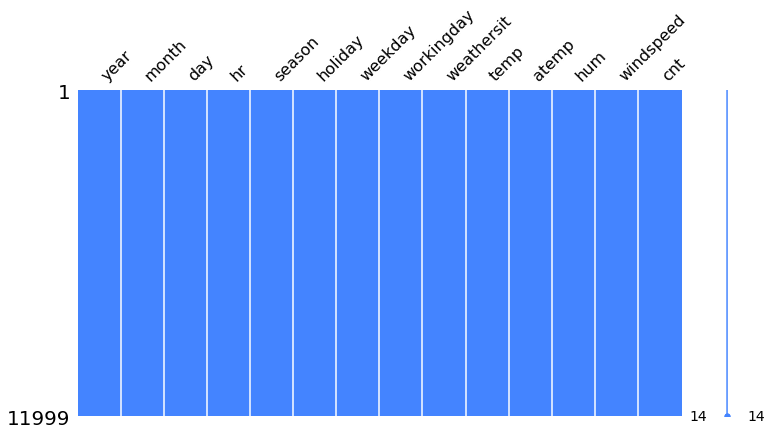

In [59]:
#calidad de los datos de la data para el entrenamiento
msno.matrix(df_train, figsize=(12,6),color=(0.27, 0.52, 1.0)) #0.3,0.36,0.44 / 1, 0.38, 0.27 / 0.27, 0.52, 1.0
#se puede apreciar que se cuenta con los datos completos

In [67]:
#definimos los campos para obtener una descripción general de los datos 
df_train_analisis = df_train[['hr', 'season', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
df_train_analisis.describe()

hr    season   holiday   weekday  workingday  weathersit  \
count 11,999.00 11,999.00 11,999.00 11,999.00   11,999.00   11,999.00   
mean      11.56      2.21      0.03      3.01        0.68        1.44   
std        6.91      1.09      0.16      2.01        0.46        0.65   
min        0.00      1.00      0.00      0.00        0.00        1.00   
25%        6.00      1.00      0.00      1.00        0.00        1.00   
50%       12.00      2.00      0.00      3.00        1.00        1.00   
75%       18.00      3.00      0.00      5.00        1.00        2.00   
max       23.00      4.00      1.00      6.00        1.00        4.00   

           temp     atemp       hum  windspeed       cnt  
count 11,999.00 11,999.00 11,999.00  11,999.00 11,999.00  
mean       0.47      0.45      0.63       0.20    158.59  
std        0.19      0.17      0.20       0.13    151.39  
min        0.02      0.00      0.00       0.00      1.00  
25%        0.32      0.30      0.47       0.10     34.00  
50%        0.46      0.45      0.62       0.19    118.00  
75%        0.62      0.59      0.79       0.28    232.00  
max        0.96      1.00      1.00       0.85    957.00

array([[<AxesSubplot:xlabel='hr', ylabel='hr'>,
        <AxesSubplot:xlabel='season', ylabel='hr'>,
        <AxesSubplot:xlabel='holiday', ylabel='hr'>,
        <AxesSubplot:xlabel='weekday', ylabel='hr'>,
        <AxesSubplot:xlabel='workingday', ylabel='hr'>,
        <AxesSubplot:xlabel='weathersit', ylabel='hr'>,
        <AxesSubplot:xlabel='temp', ylabel='hr'>,
        <AxesSubplot:xlabel='atemp', ylabel='hr'>,
        <AxesSubplot:xlabel='hum', ylabel='hr'>,
        <AxesSubplot:xlabel='windspeed', ylabel='hr'>,
        <AxesSubplot:xlabel='cnt', ylabel='hr'>],
       [<AxesSubplot:xlabel='hr', ylabel='season'>,
        <AxesSubplot:xlabel='season', ylabel='season'>,
        <AxesSubplot:xlabel='holiday', ylabel='season'>,
        <AxesSubplot:xlabel='weekday', ylabel='season'>,
        <AxesSubplot:xlabel='workingday', ylabel='season'>,
        <AxesSubplot:xlabel='weathersit', ylabel='season'>,
        <AxesSubplot:xlabel='temp', ylabel='season'>,
        <AxesSubplot:xlabel='at

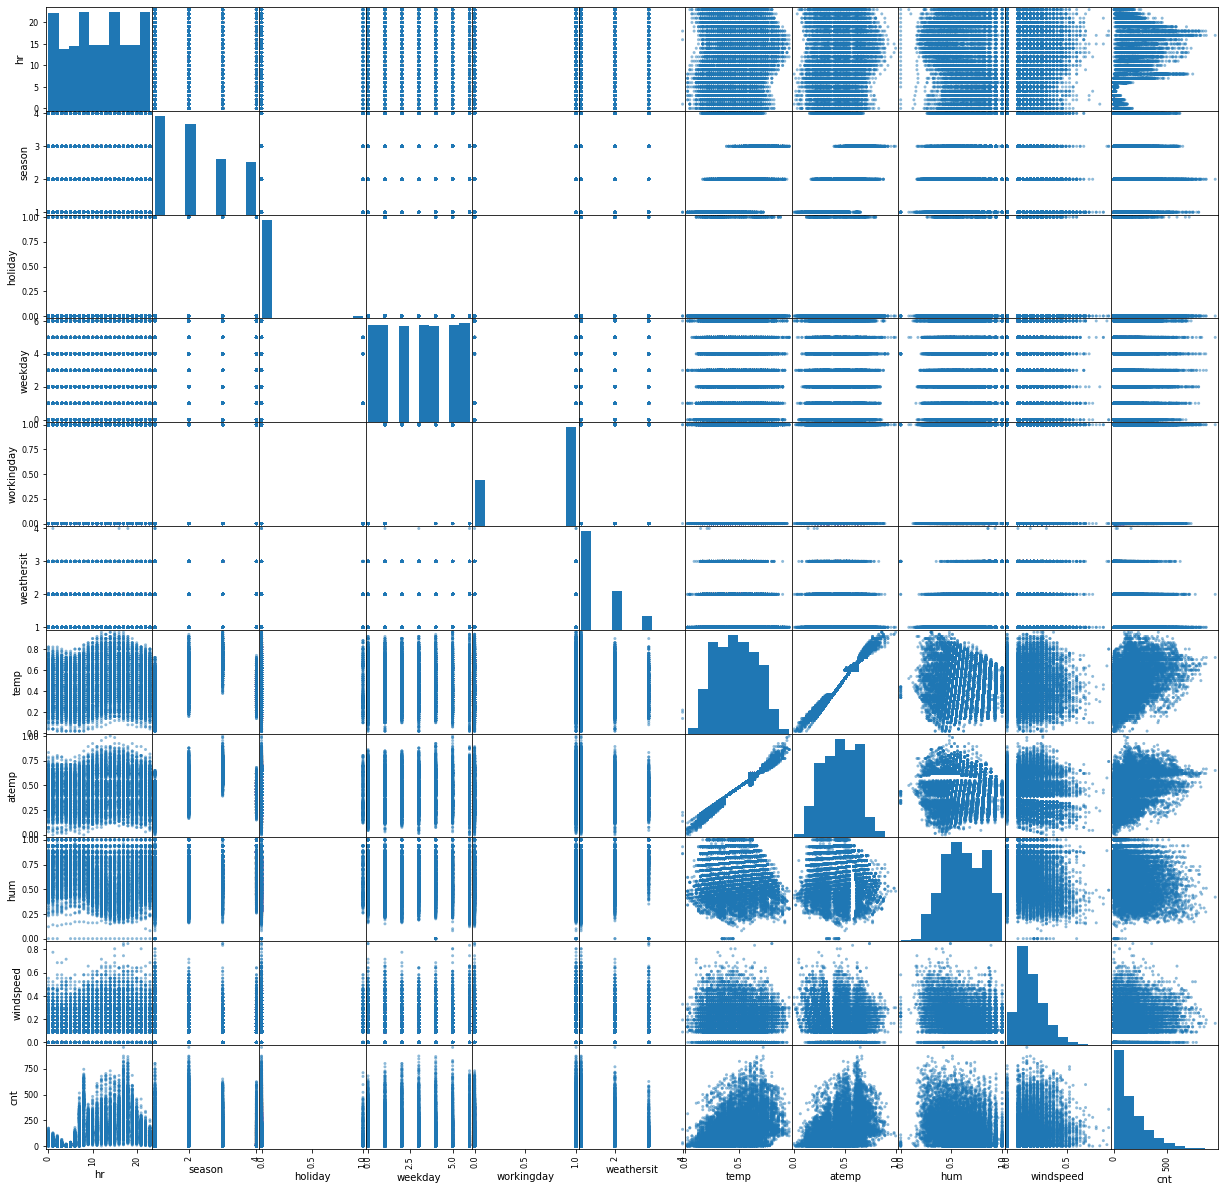

In [68]:
#visualización de la estructura de los datos previos
scatter_matrix(df_train_analisis, figsize=(21,21))

In [1]:
#calculando la matriz de correlacion
corr = df_train

NameError: name 'df_train' is not defined

In [70]:
#generando mascara para el triangulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

#figura para ploteo
f , ax = plt.subplots(figsize=(15,15))

#dibuja el mapa de calor con la máscara y la relación de aspecto correcto
sns.heatmap(corr, mask=mask, cmap='Blues',  vmax=1, center=0,
            square=True, linewidths=.1, annot=True)

<AxesSubplot:>

Error in callback <function flush_figures at 0x000001E8239EA5F0> (for post_execute):


In [324]:
list_plot = ['season', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

In [325]:
from statsmodels.tsa.stattools import adfuller
for i in list_plot:
    x = df_train[i].values
    x = np.nan_to_num(x)
    result = adfuller(x)
    print(i), print('ADF static: %f' % result[0]), print('p-value: %f' % result[1]), print('Critical values')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

season
ADF static: -1.836901
p-value: 0.362301
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
holiday
ADF static: -15.395308
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
weekday
ADF static: -17.681288
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
workingday
ADF static: -19.455652
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
weathersit
ADF static: -21.264111
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
temp
ADF static: -3.947775
p-value: 0.001710
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
atemp
ADF static: -4.367757
p-value: 0.000338
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
hum
ADF static: -10.209541
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
windspeed
ADF static: -13.387015
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
casual
ADF static: -10.429571
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862

season


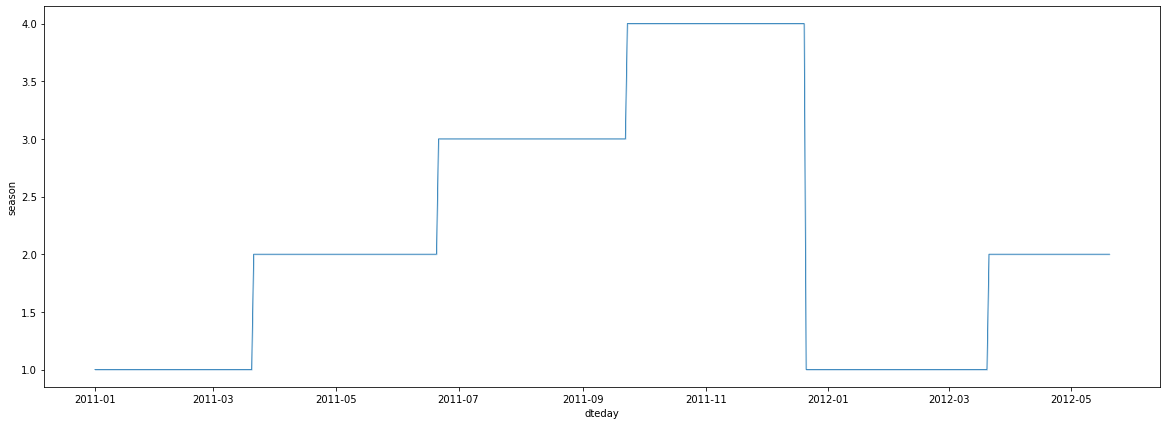

holiday


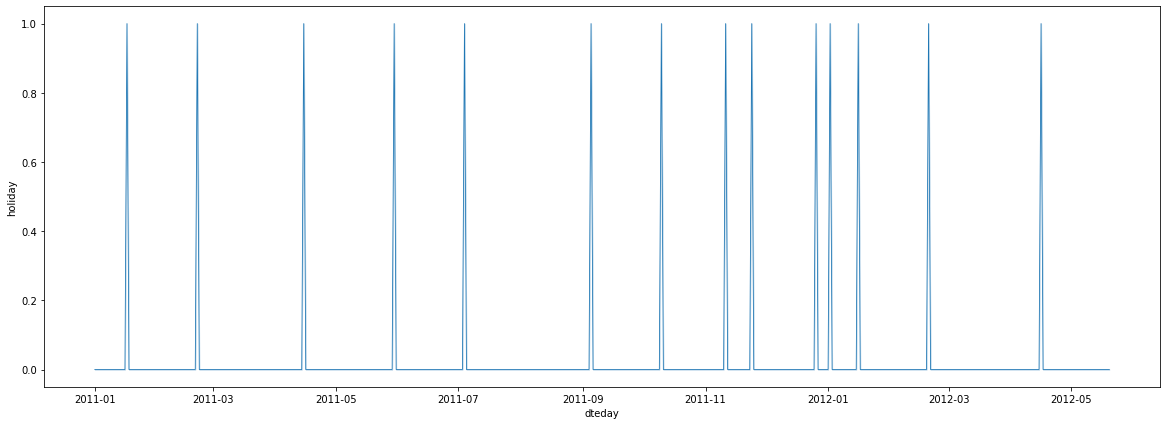

weekday


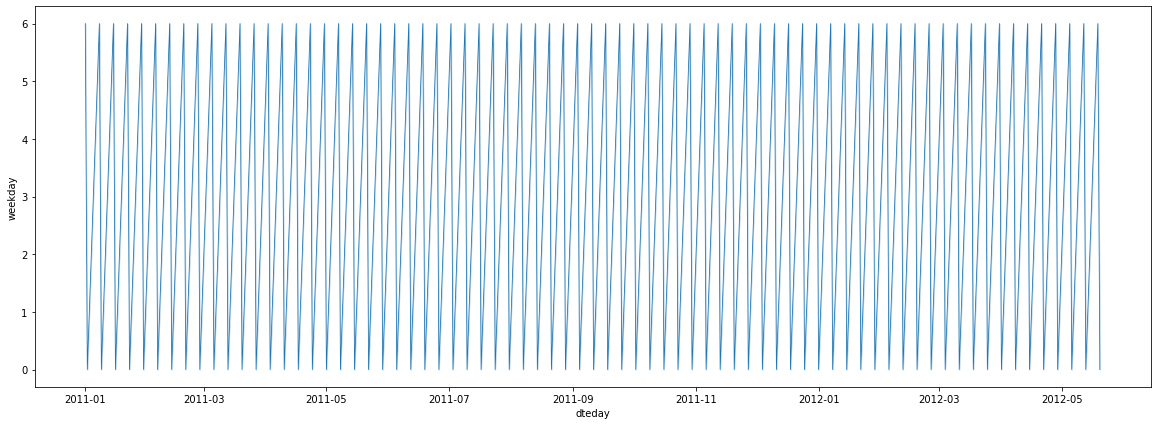

workingday


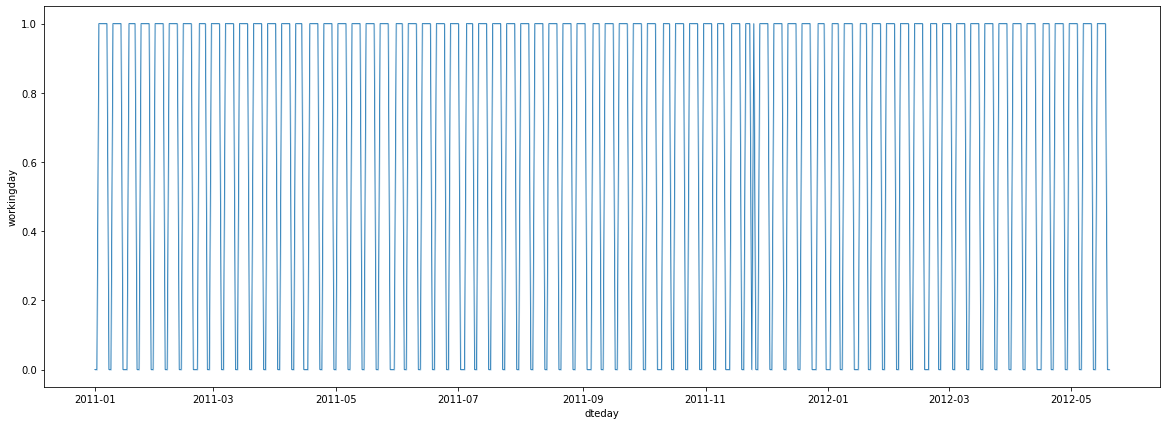

weathersit


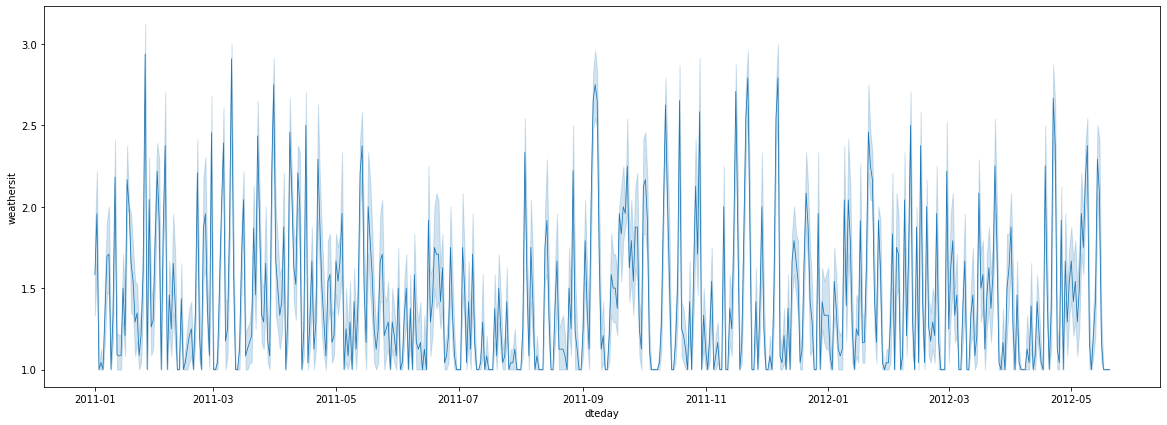

temp


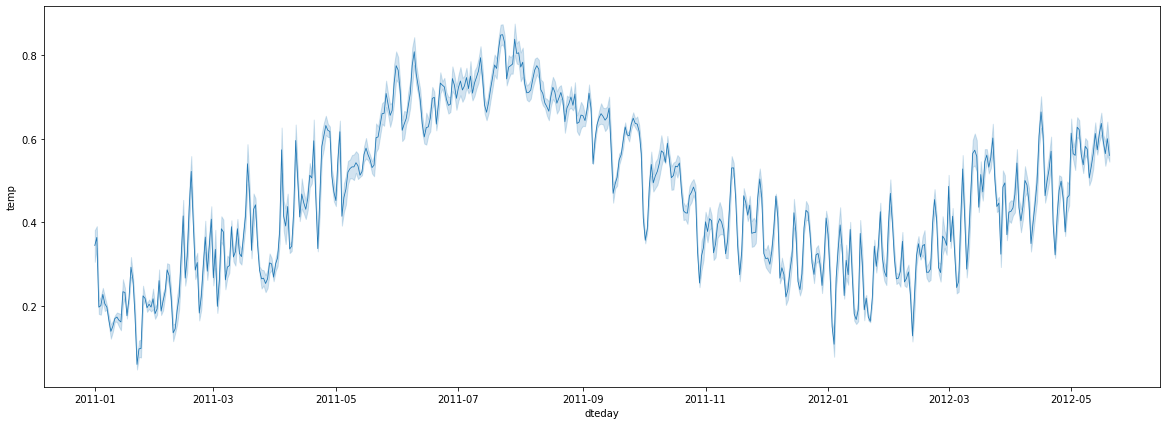

atemp


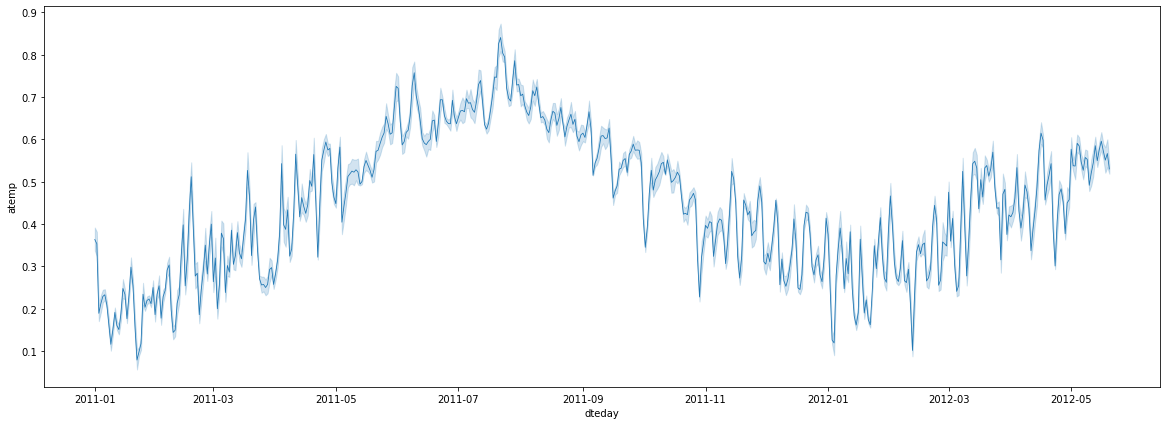

hum


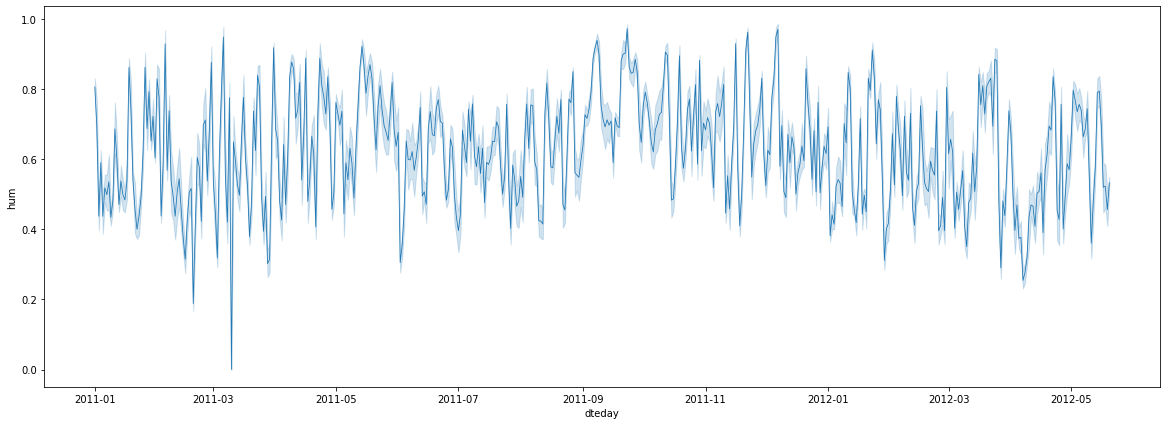

windspeed


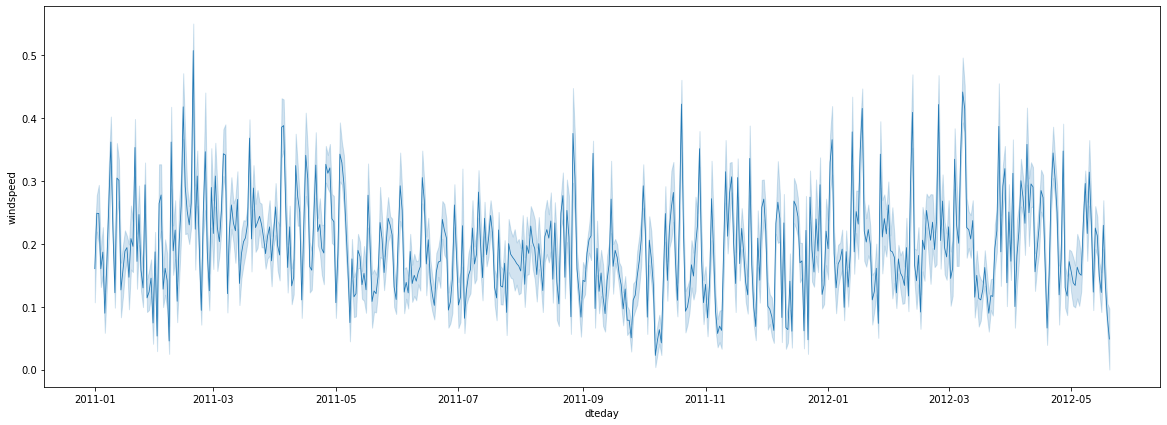

casual


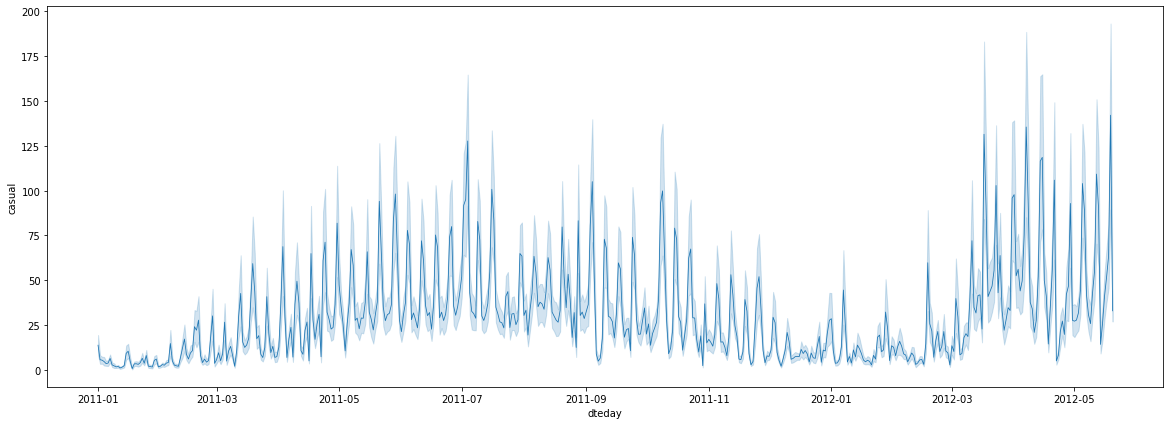

registered


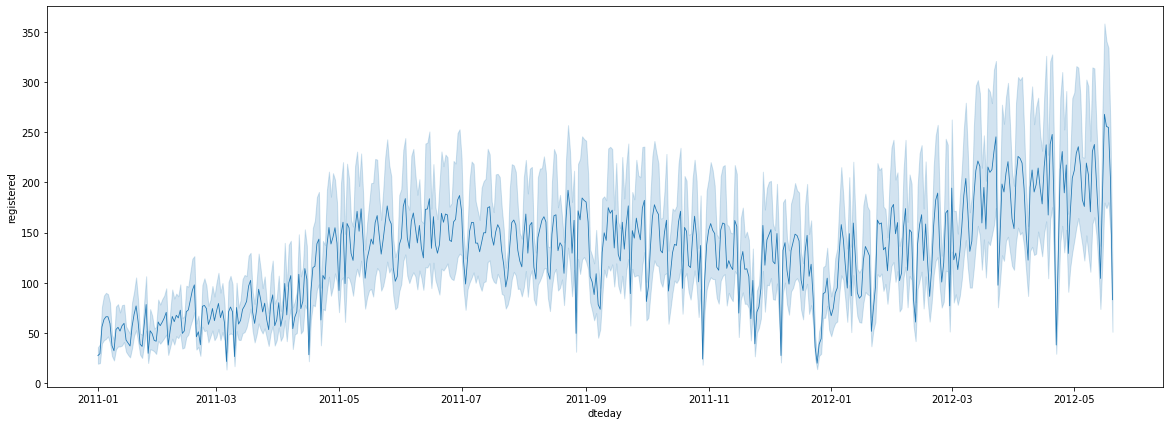

cnt


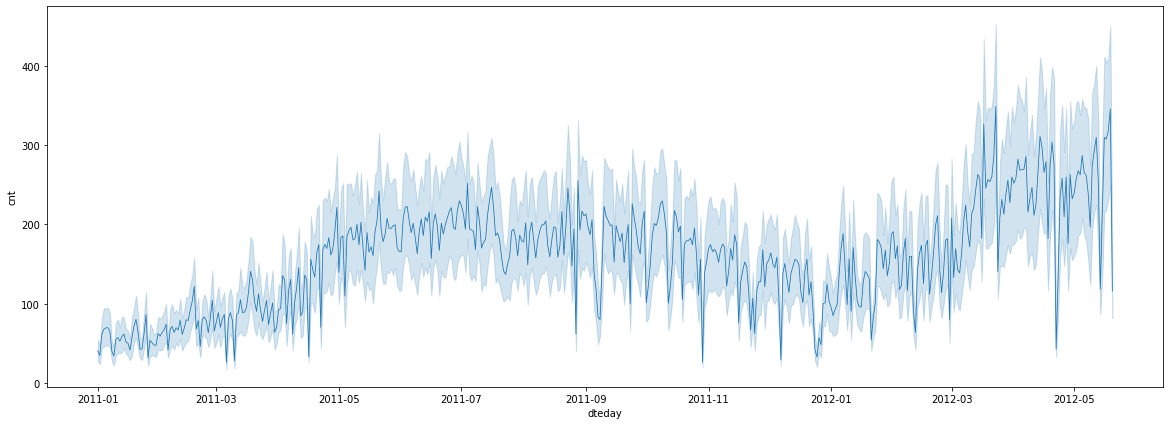

In [326]:
for i in list_plot:
    print(i)
    fig, ax =plt.subplots(figsize=(20,7))
    sns.lineplot(data=df_train, y=i, x='dteday', linewidth=.8)
    plt.show()

season


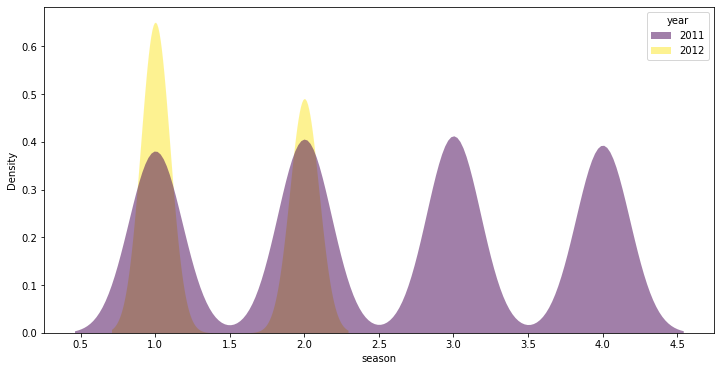

holiday


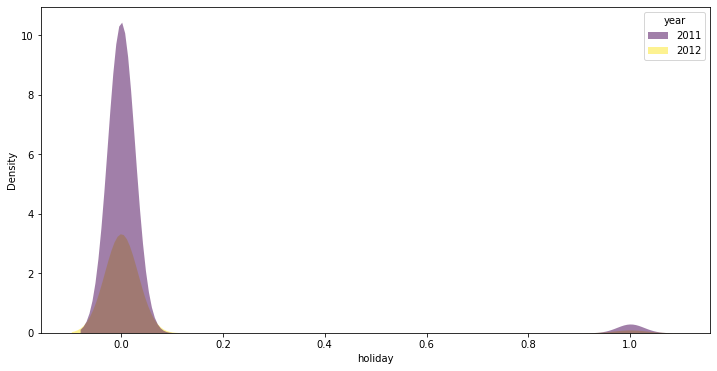

weekday


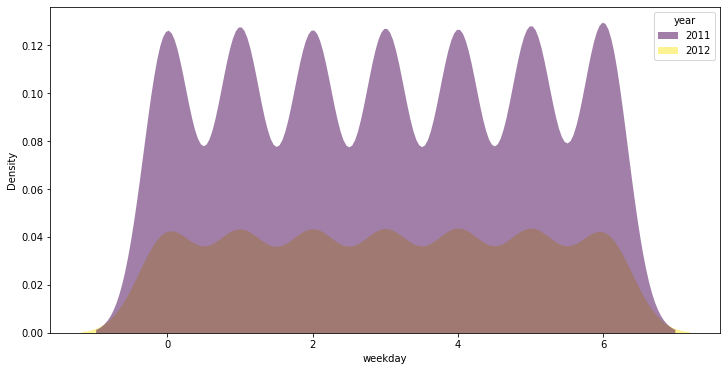

workingday


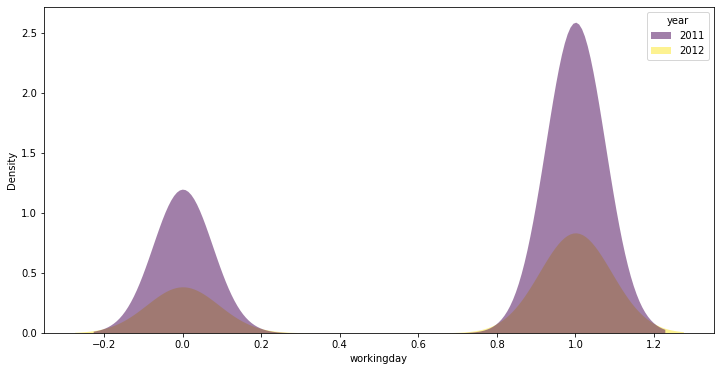

weathersit


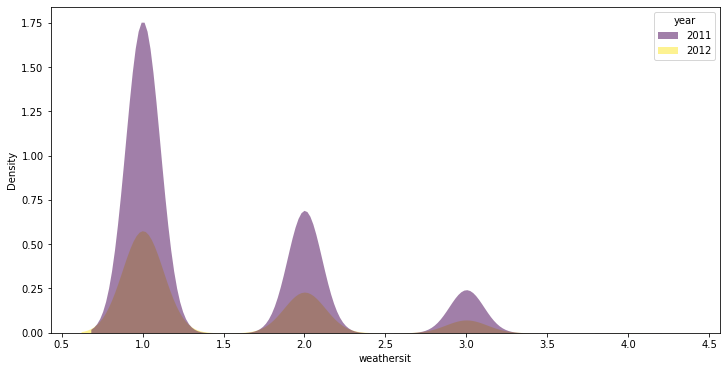

temp


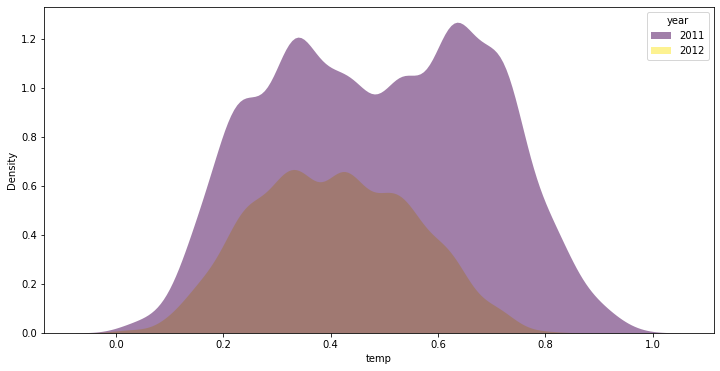

atemp


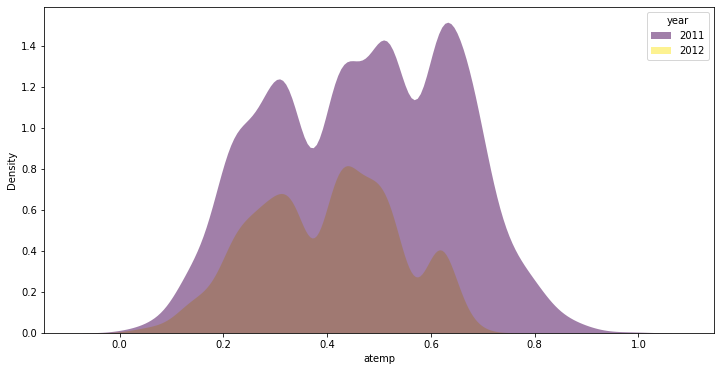

hum


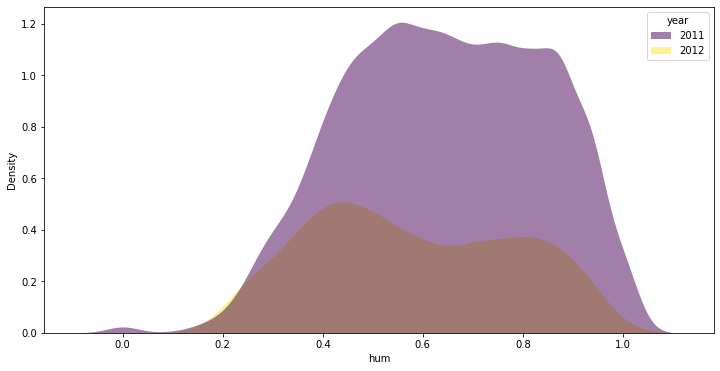

windspeed


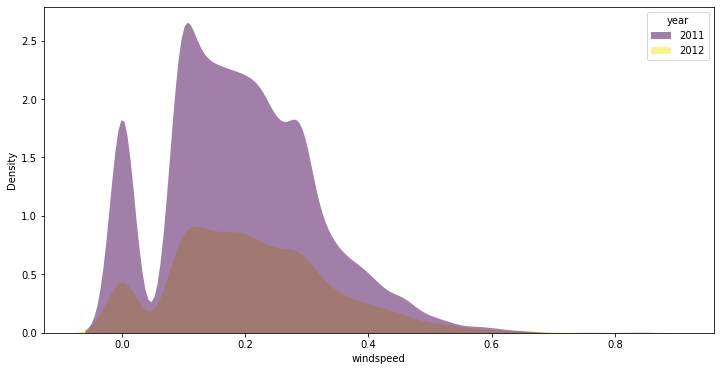

casual


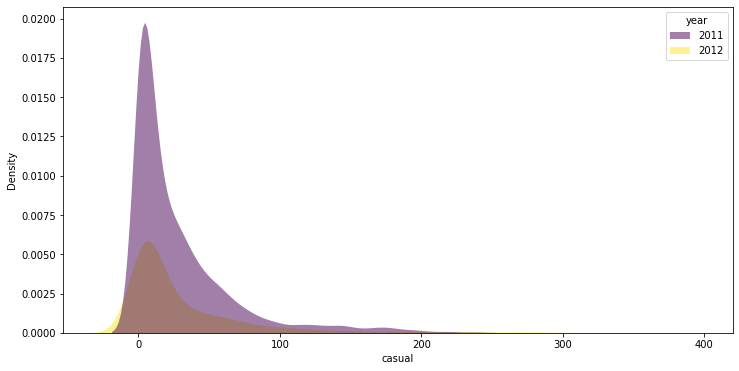

registered


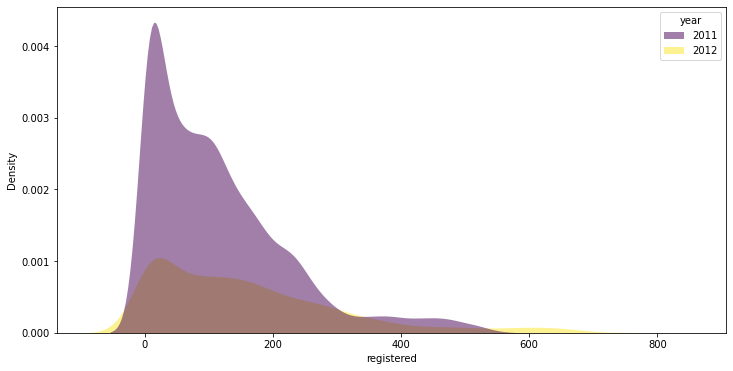

cnt


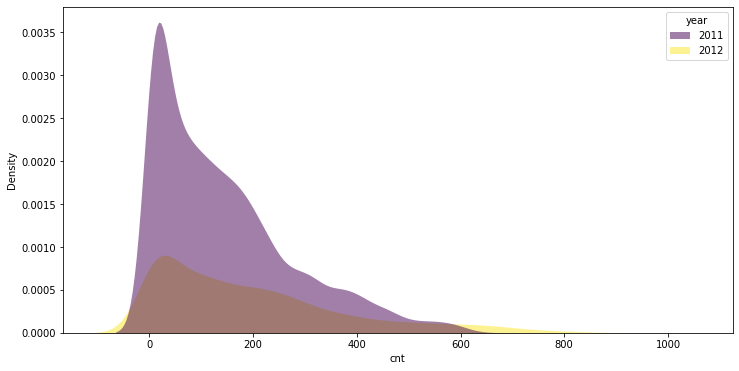

In [327]:
for i in list_plot:
    print(i)
    fig, ax =plt.subplots(figsize=(12,6))
    sns.kdeplot(data=df_train, x=i, hue='year', fill=True, alpha=.5, linewidth=0, palette='viridis')
    plt.show()

season


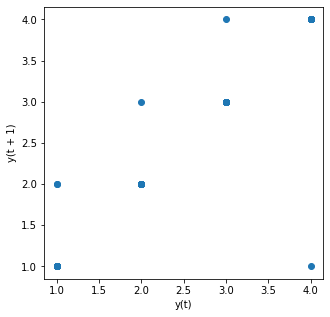

holiday


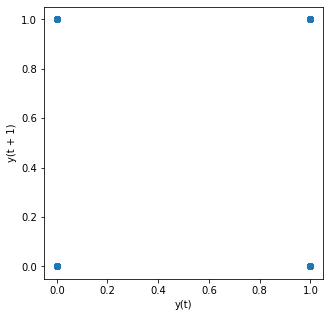

weekday


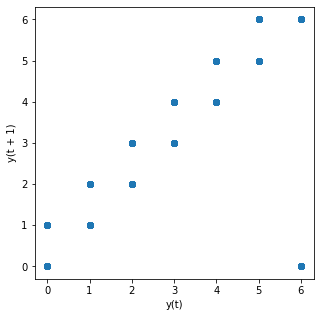

workingday


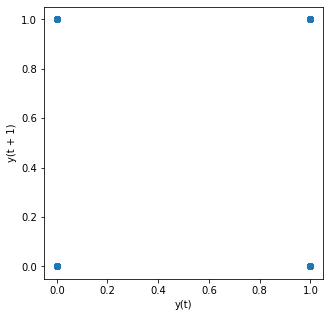

weathersit


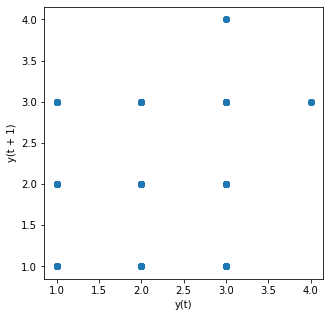

temp


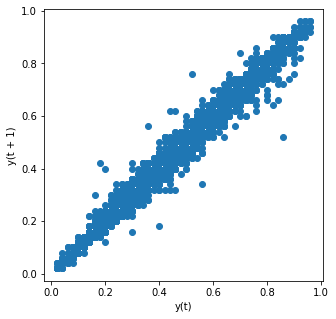

atemp


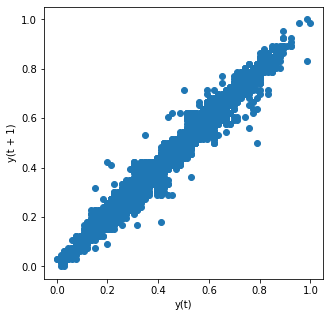

hum


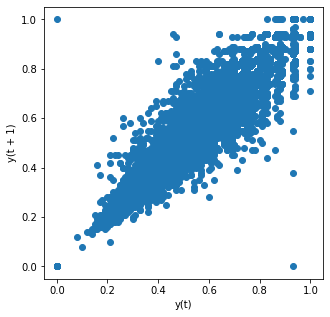

windspeed


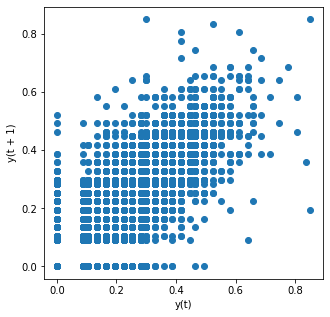

casual


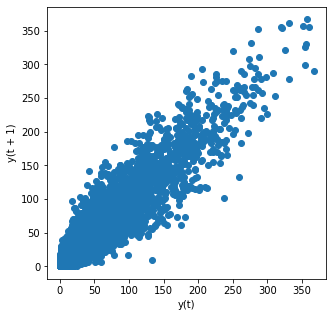

registered


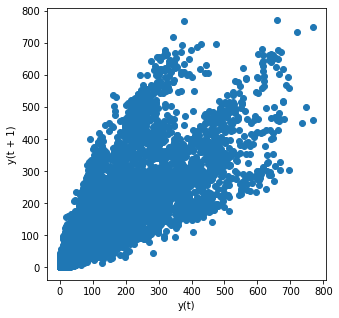

cnt


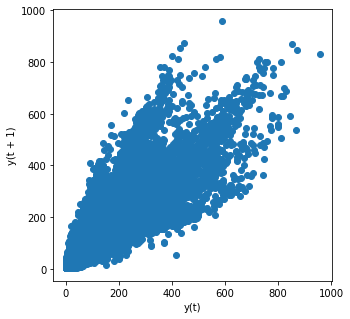

In [328]:
from pandas.plotting import lag_plot
for i in list_plot:
    print(i)
    lag_plot(df_train[i])
    plt.show()

In [329]:
df_diff = df_train.diff()

In [330]:
df_diff['year'] = df_train['year']
df_diff['month'] = df_train['mnth']
df_diff['dteday'] = df_train['dteday']


<AxesSubplot:>

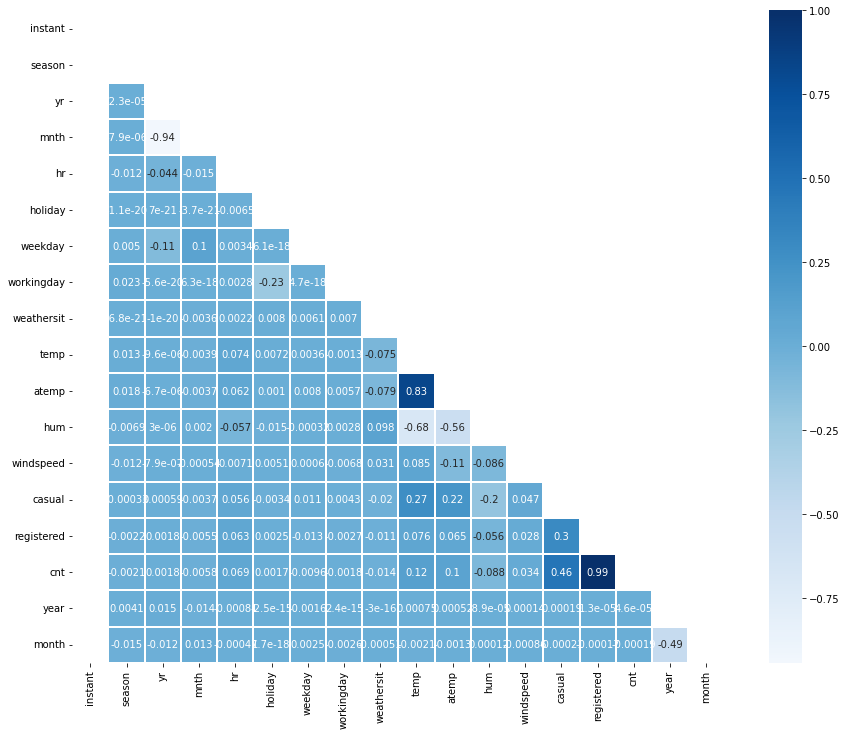

In [331]:
corr_diff = df_diff.corr(method='pearson')
#generando mascara para el triangulo superior
mask = np.triu(np.ones_like(corr_diff, dtype=bool))

#figura para ploteo
f , ax = plt.subplots(figsize=(16,12))

#dibuja el mapa de calor con la máscara y la relación de aspecto correcto
sns.heatmap(corr_diff, mask=mask, cmap='Blues',  vmax=1, center=0,
            square=True, linewidths=.1, annot=True)

In [332]:
df_diff['instant'] = df_train['instant']

season


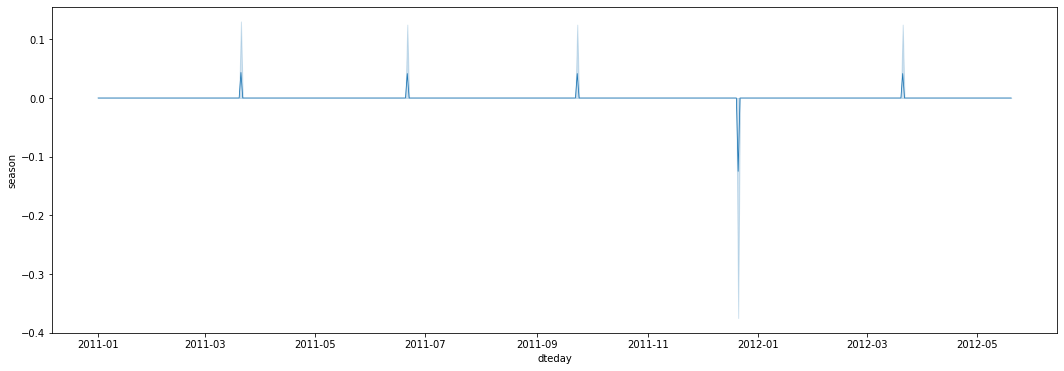

holiday


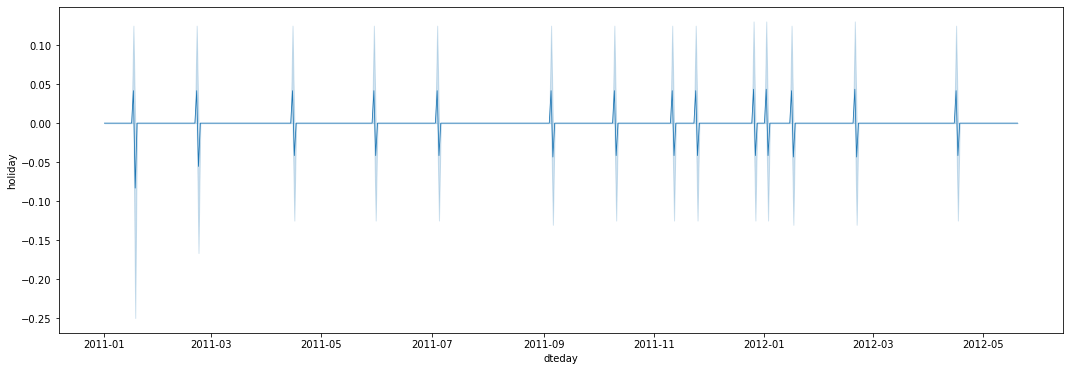

weekday


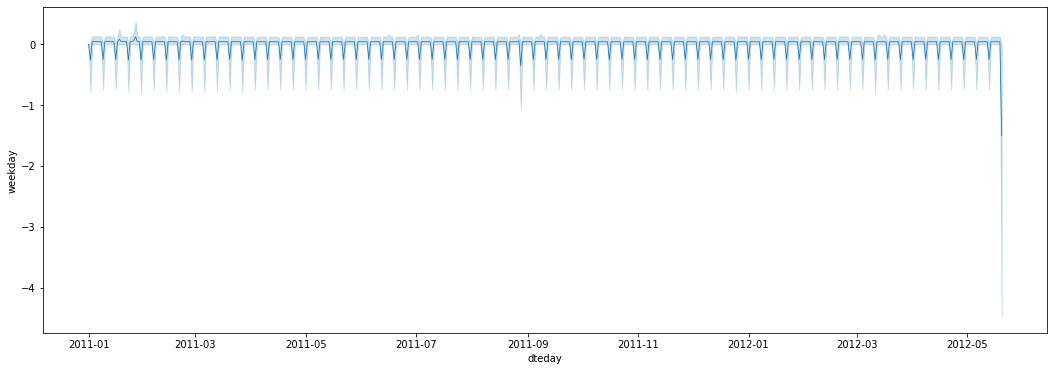

workingday


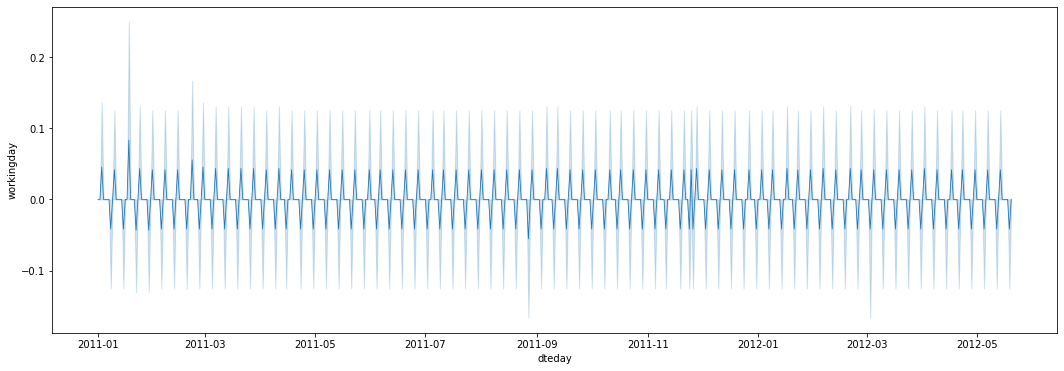

weathersit


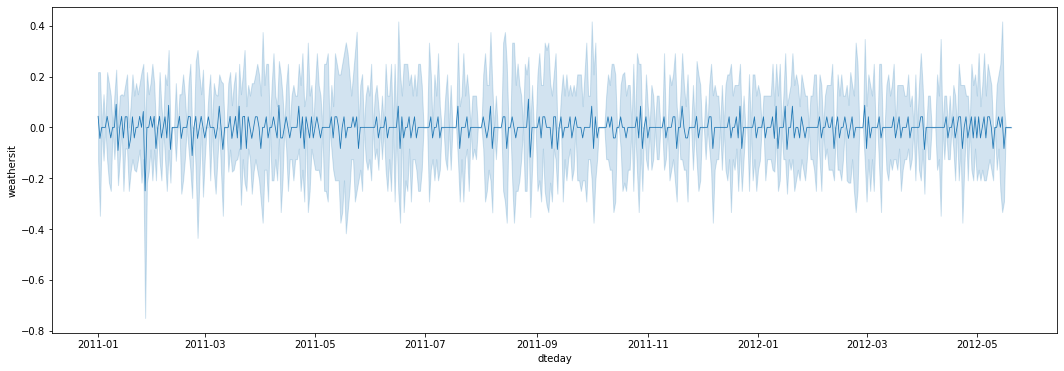

temp


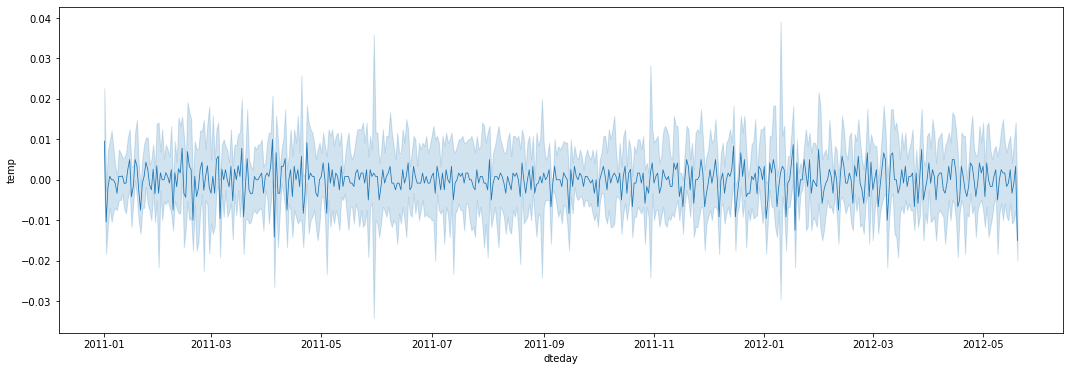

atemp


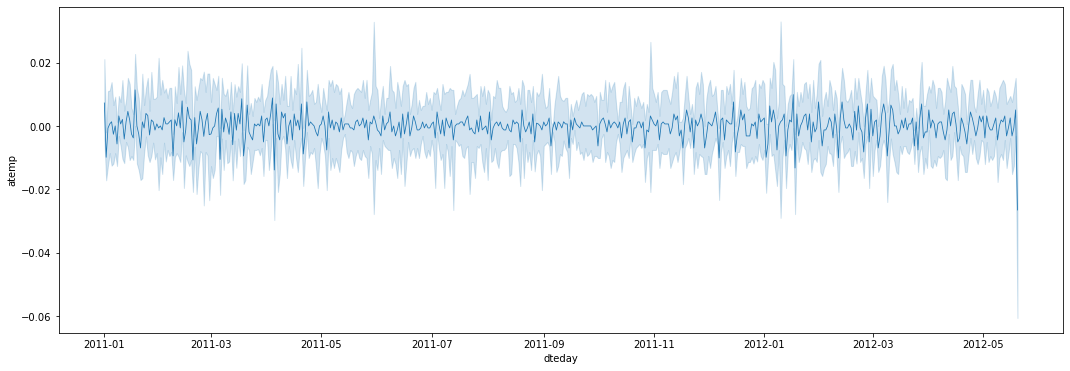

hum


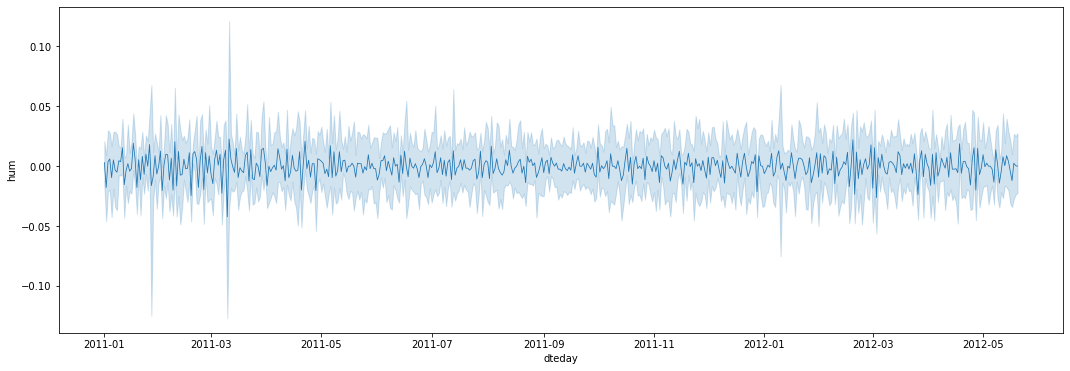

windspeed


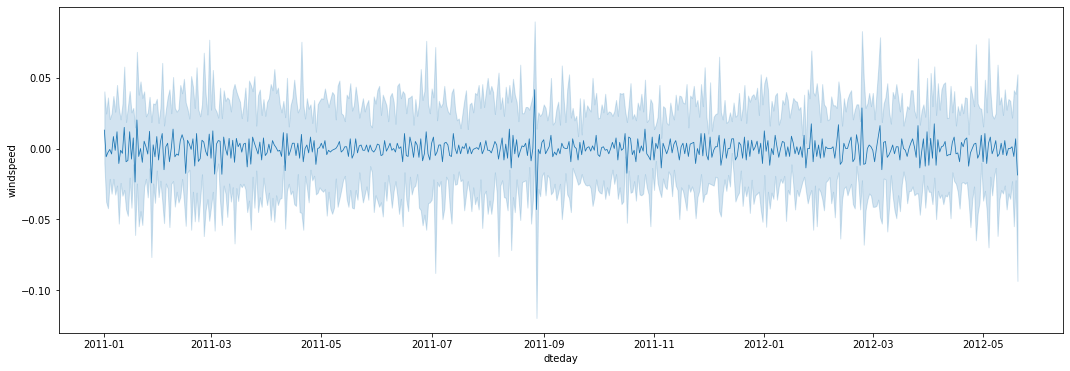

casual


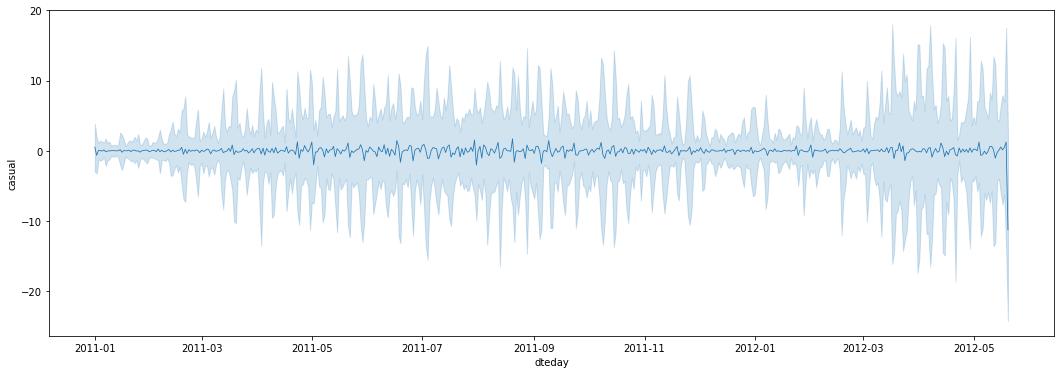

registered


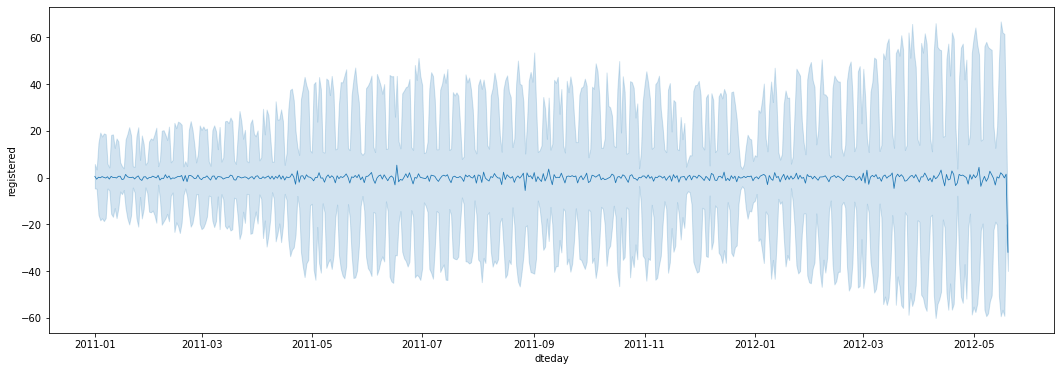

cnt


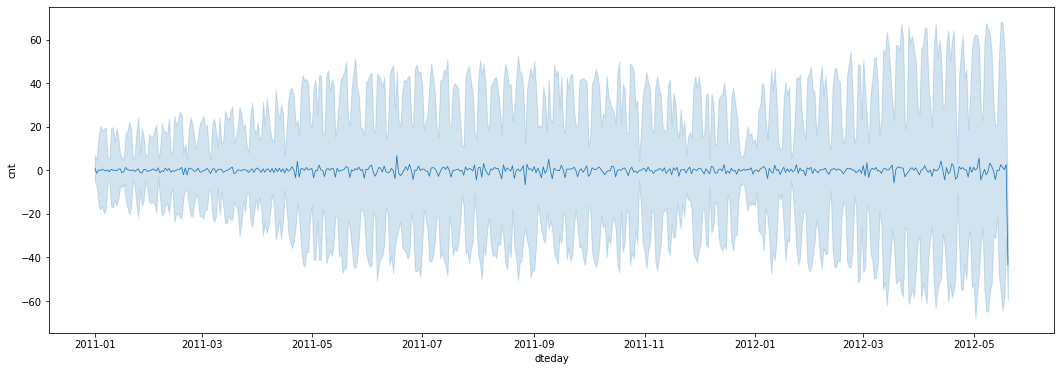

In [333]:
for i in list_plot:
    print(i)
    fig, ax =plt.subplots(figsize=(18,6))
    sns.lineplot(data=df_diff, y=i, x='dteday', linewidth=.8)
    plt.show()

season


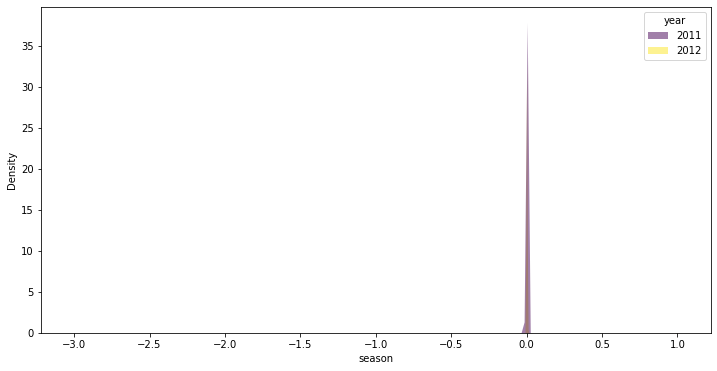

holiday


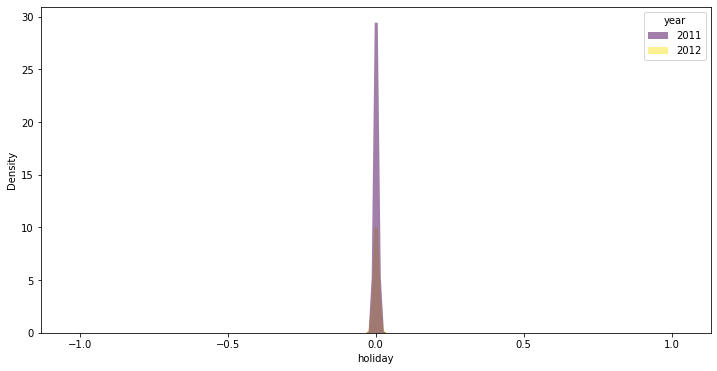

weekday


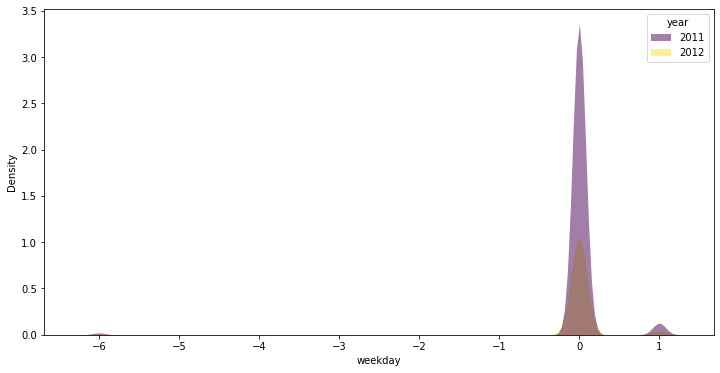

workingday


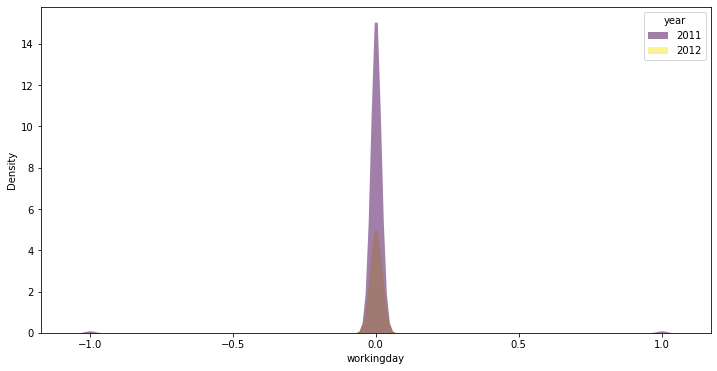

weathersit


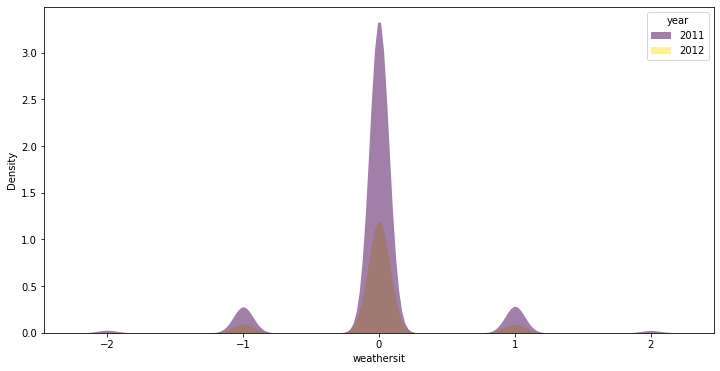

temp


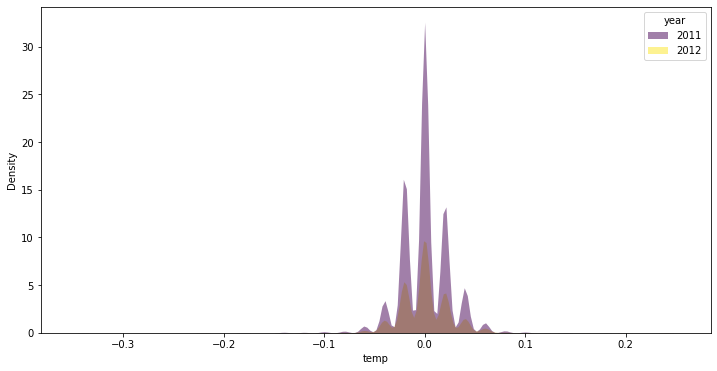

atemp


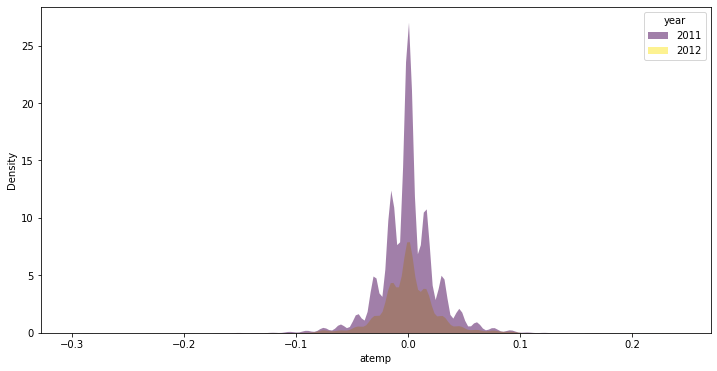

hum


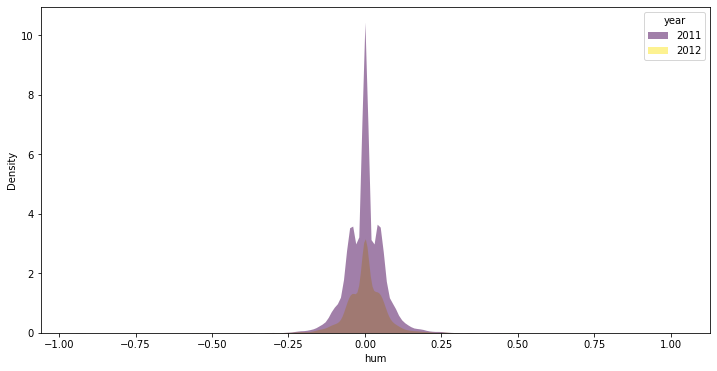

windspeed


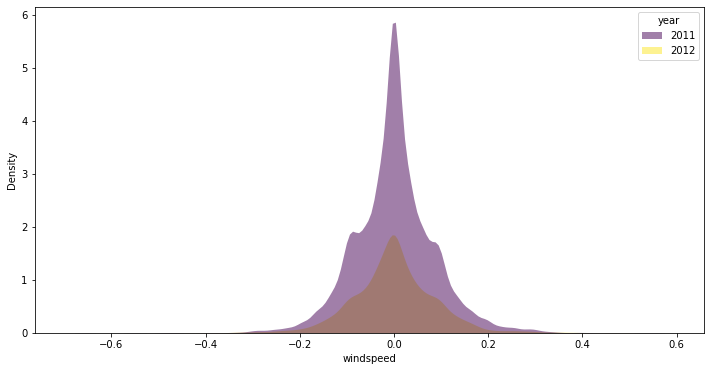

casual


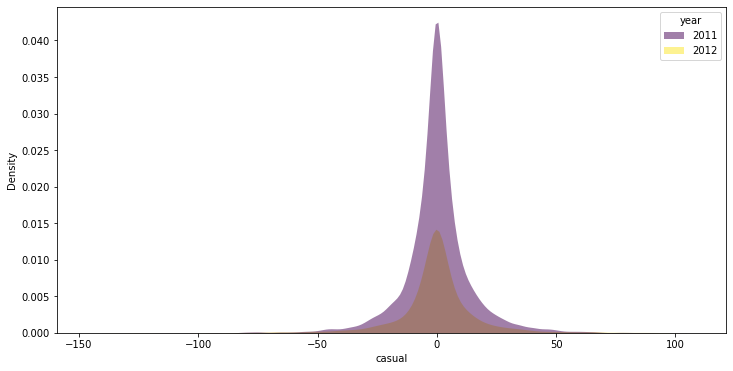

registered


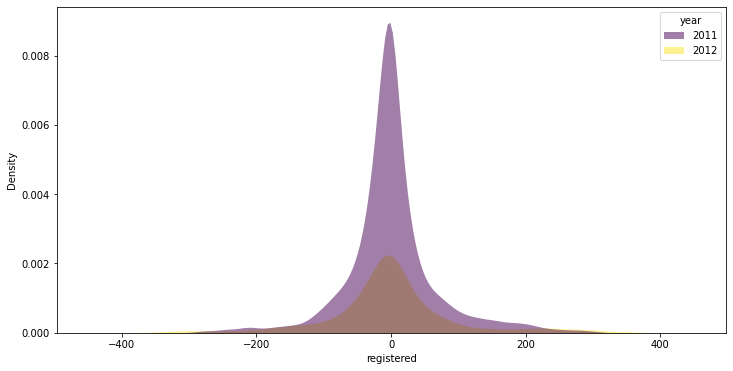

cnt


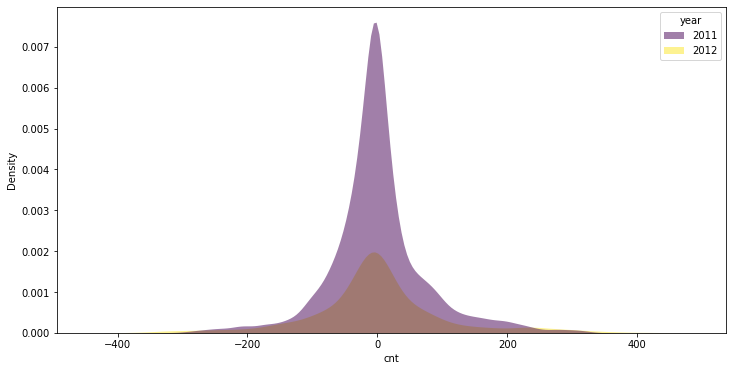

In [334]:
for i in list_plot:
    print(i)
    fig, ax =plt.subplots(figsize=(12,6))
    sns.kdeplot(data=df_diff, x=i, hue='year', fill=True, alpha=.5, linewidth=0, palette='viridis')
    plt.show()

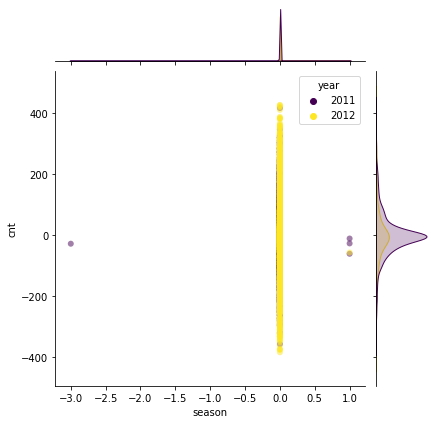

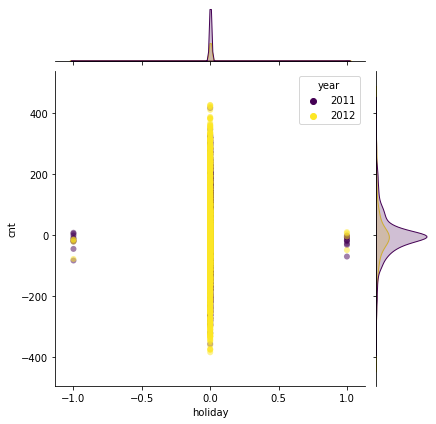

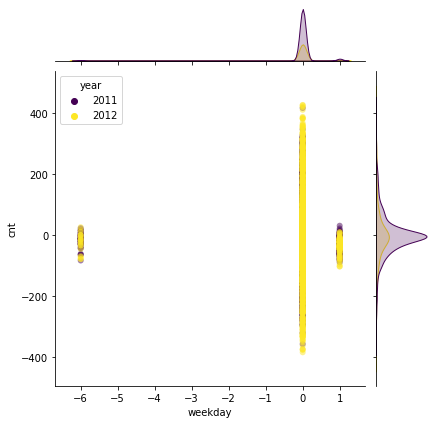

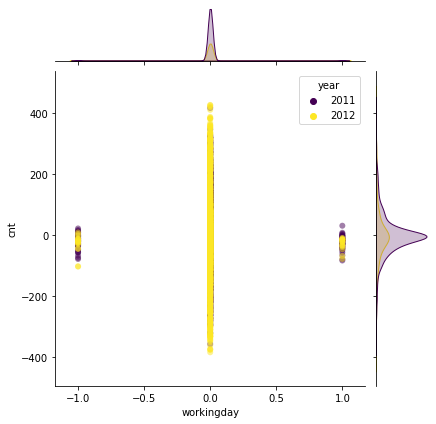

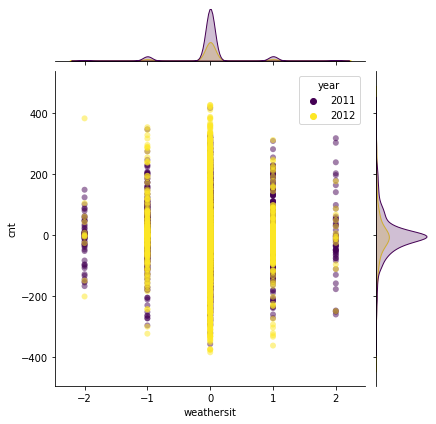

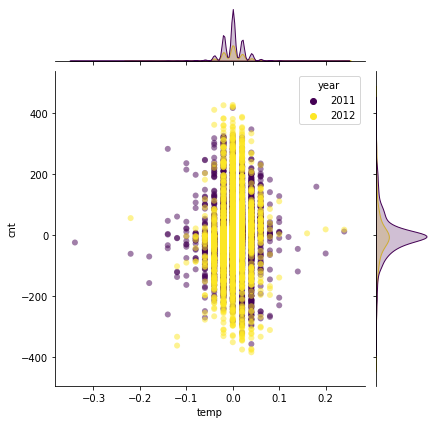

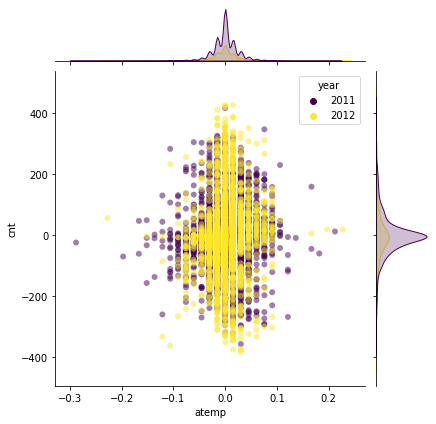

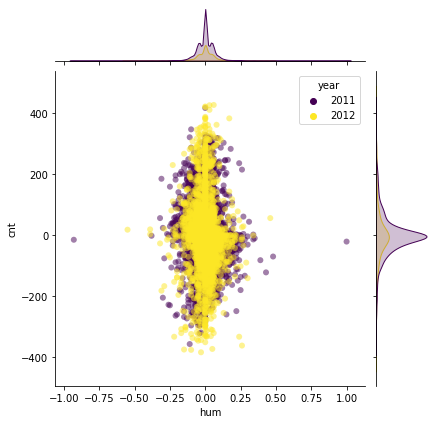

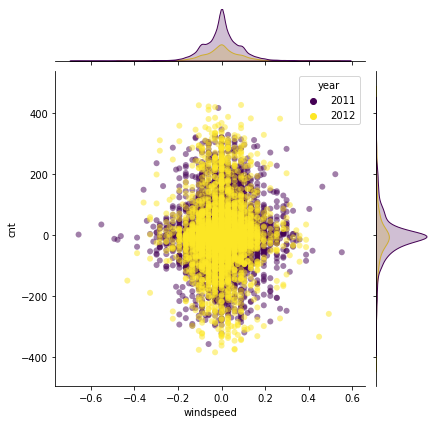

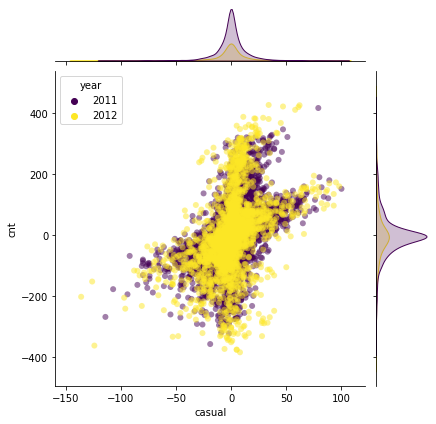

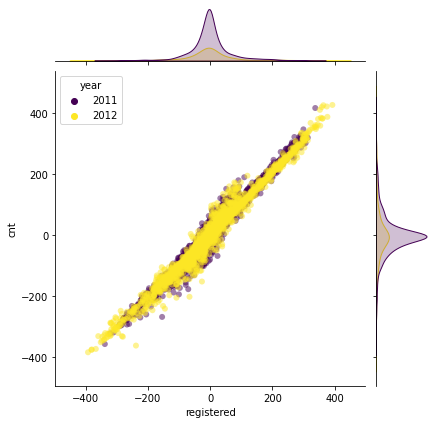

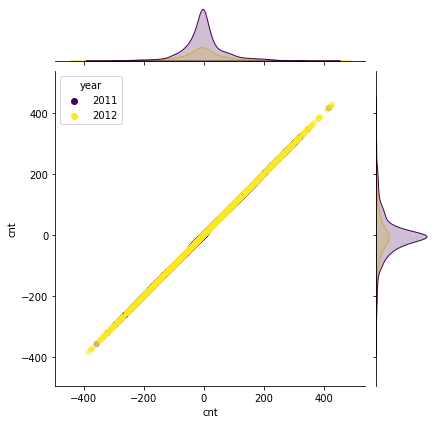

In [335]:
for i in list_plot:
    sns.jointplot(data=df_diff, y='cnt', x=i, hue='year', alpha=.5, linewidth=0, palette='viridis')
    plt.show()

In [336]:
from statsmodels.tsa.stattools import adfuller
for i in list_plot:
    x = df_diff[i].values
    x = np.nan_to_num(x)
    result = adfuller(x)
    print(i), print('ADF static: %f' % result[0]), print('p-value: %f' % result[1]), print('Critical values')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

season
ADF static: -109.526955
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
holiday
ADF static: -36.318954
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
weekday
ADF static: -26.224770
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
workingday
ADF static: -109.526253
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
weathersit
ADF static: -24.529621
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
temp
ADF static: -23.879297
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
atemp
ADF static: -23.661217
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
hum
ADF static: -26.798742
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
windspeed
ADF static: -27.037150
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567
casual
ADF static: -20.238294
p-value: 0.000000
Critical values
	1%: -3.431
	5%: -

In [337]:
df = df_train[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',	'workingday', 'weathersit',	'temp',	'atemp', 'hum',	'windspeed', 'casual', 'registered', 'cnt']]

In [338]:
df_log = np.log(df + 1)
df_log['year'] = df_train['year']
df_log['month'] = df_train['mnth']
df_log['dteday'] = df_train['dteday']


<AxesSubplot:>

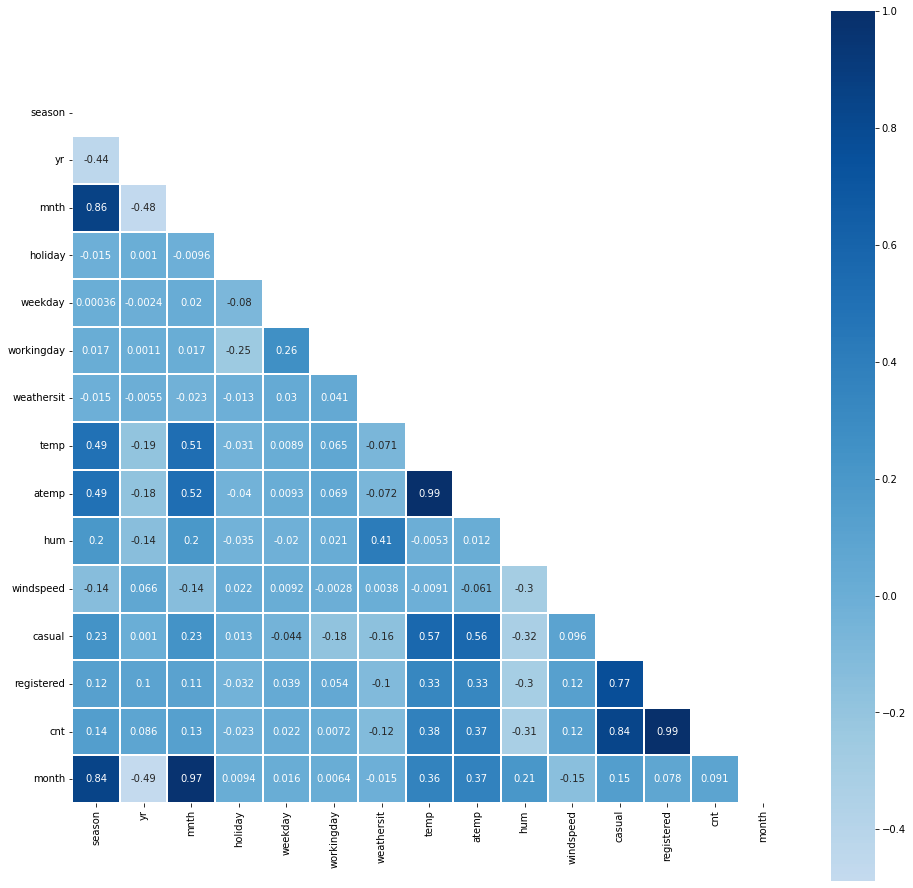

In [339]:
#quitando los datos que no tienen mucha correlacion
#calculando la matris de correlacion
corr_log = df_log[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'month']].corr()
#generando mascara para el triangulo superior
mask = np.triu(np.ones_like(corr_log, dtype=bool))

#figura para ploteo
f , ax = plt.subplots(figsize=(16,16))

#dibuja el mapa de calor con la máscara y la relación de aspecto correcto
sns.heatmap(corr_log, mask=mask, cmap='Blues',  vmax=1, center=0,
            square=True, linewidths=.1, annot=True)

season


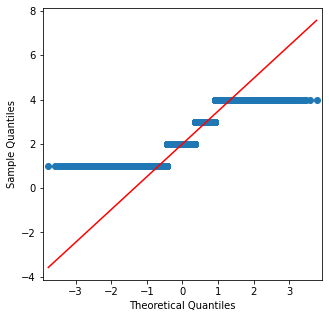

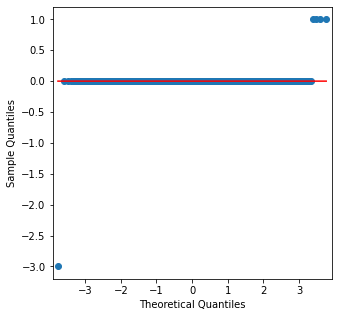

holiday


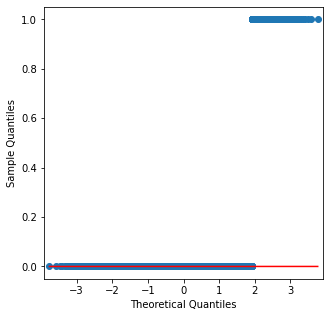

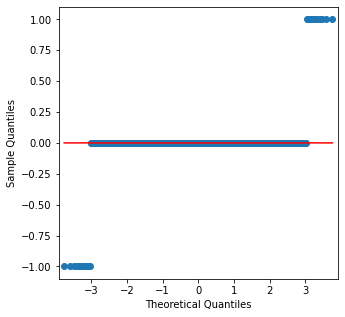

weekday


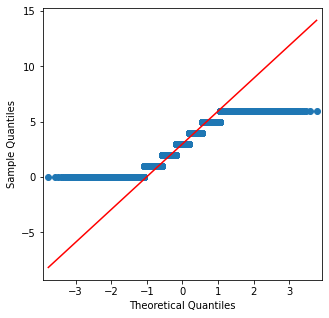

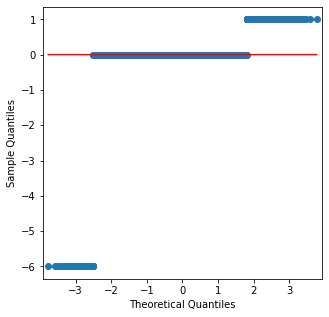

workingday


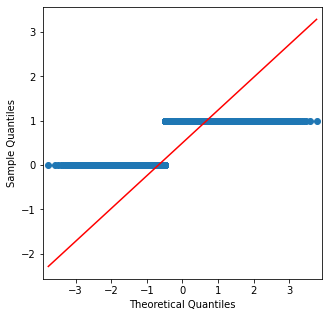

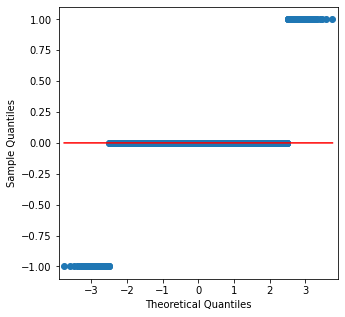

weathersit


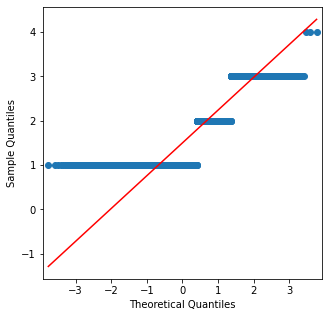

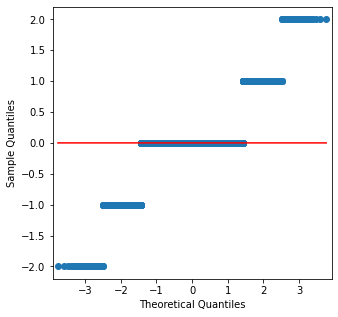

temp


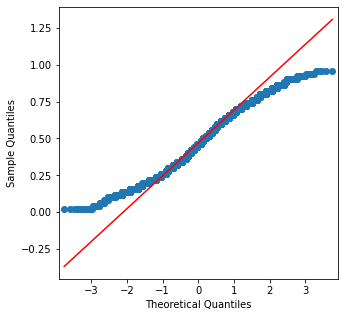

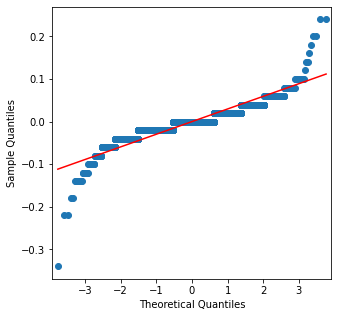

atemp


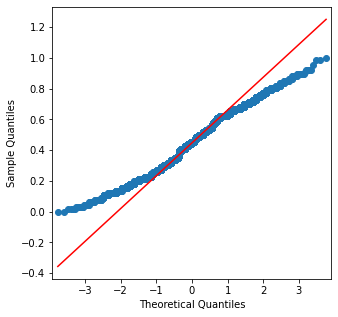

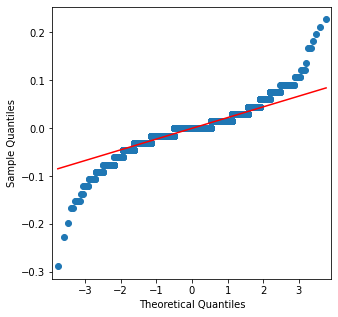

hum


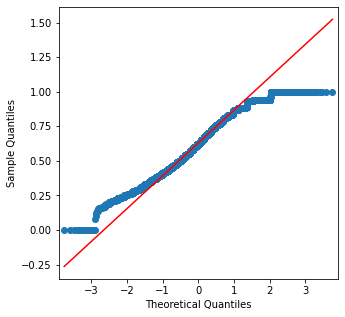

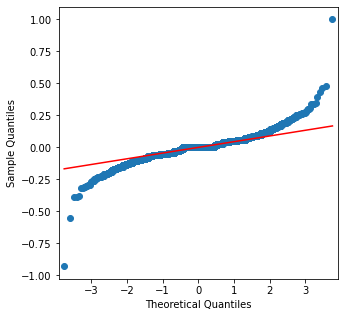

windspeed


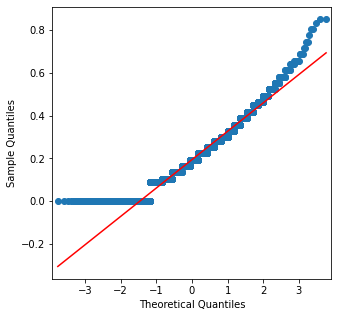

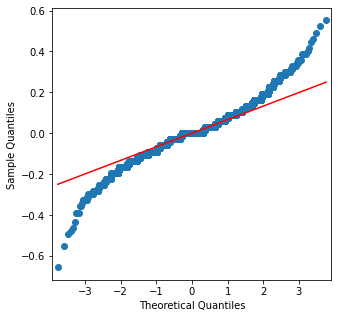

casual


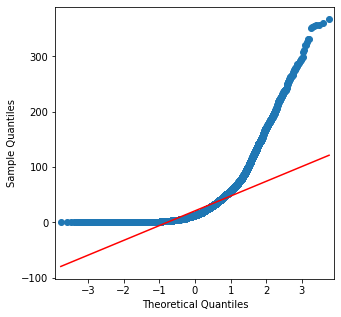

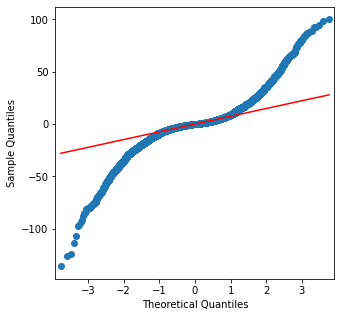

registered


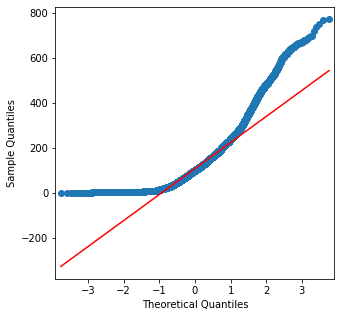

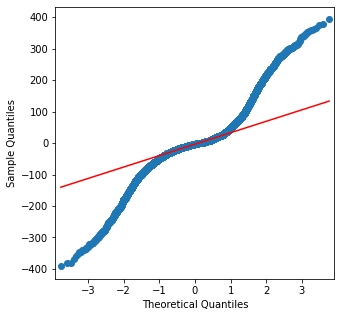

cnt


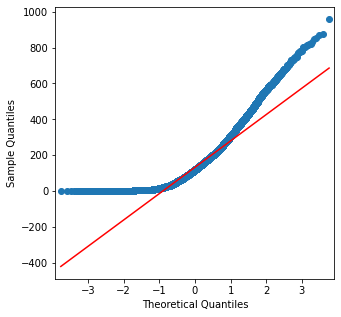

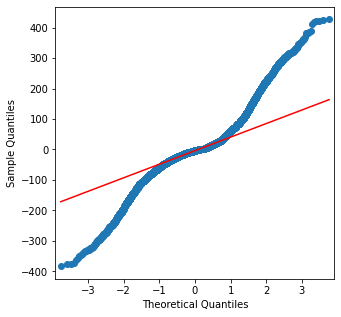

In [340]:
from statsmodels.graphics.gofplots import qqplot
for i in list_plot:
    print (i)
    y = df_train[i].fillna(0)
    x = df_diff[i].fillna(0)
    plt.rc('figure', figsize=(5,5), )
    qqplot(y, line='q')
    qqplot(x, line='q')
    plt.show()

entrenamiento y testeo

In [341]:
train_target = df_train['cnt']
train_feature = df_train.drop(['cnt'], axis=1)
train_target.shape, train_feature.shape

((11999,), (11999, 18))

In [342]:
train_feature['year'] = train_feature['dteday'].apply(lambda x : x.year)
train_feature['month'] = train_feature['dteday'].apply(lambda x : x.month)
train_feature['day'] = train_feature['dteday'].apply(lambda x : x.day)

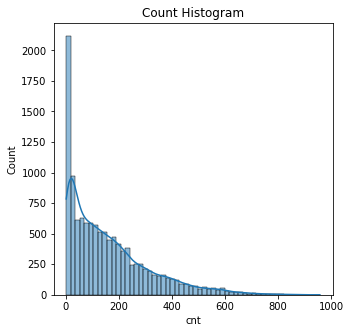

In [343]:
# train_target histogram 
plt.title('Count Histogram')
sns.histplot(train_target, kde=True)
plt.show()

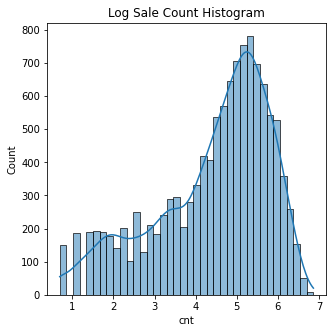

In [344]:
# train_target log transformation
plt.title('Log Sale Count Histogram')
train_target_log = np.log1p(train_target)
sns.histplot(train_target_log, kde=True)
plt.show()

In [345]:
train_target_log.describe()

count   11,999.00
mean         4.41
std          1.40
min          0.69
25%          3.56
50%          4.78
75%          5.45
max          6.86
Name: cnt, dtype: float64

In [346]:
train_featute_ohe = pd.get_dummies(train_feature, columns=['season', 'hr'])
train_featute_ohe = train_featute_ohe.drop(columns={'casual', 'registered', 'dteday', 'yr', 'mnth'})
train_featute_ohe.columns

Index(['instant', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'year', 'month', 'day', 'season_1',
       'season_2', 'season_3', 'season_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3',
       'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
       'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [347]:
df_test['year'] = df_test['dteday'].apply(lambda x : x.year)
df_test['month'] = df_test['dteday'].apply(lambda x : x.month)
df_test['day'] = df_test['dteday'].apply(lambda x : x.day)

In [348]:
test_ohe = pd.get_dummies(df_test, columns=['season',  'hr'])
test_ohe = test_ohe.drop(columns={'dteday', 'yr', 'mnth'})
test_ohe.columns

Index(['instant', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'year', 'month', 'day', 'season_1',
       'season_2', 'season_3', 'season_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3',
       'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
       'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [349]:
train_featute_ohe.columns == test_ohe.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [350]:
from sklearn.model_selection import train_test_split 

X_train, X_validation, y_train, y_validation = train_test_split(train_featute_ohe, train_target_log, test_size=0.3, random_state=2208)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape


((8399, 40), (3600, 40), (8399,), (3600,))

In [351]:
# Root Mean Squared Log Error
def rmsle(y, pred):  
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    print('RMSLE: {0:.3f}'.format(rmsle_val))

In [352]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_validation)

evaluate_regr(y_validation, pred)

RMSLE: 0.147


In [353]:
def get_model_predict(model, X_train, X_validation, y_train, y_validation, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_validation)

    print('#',model.__class__.__name__,)
    evaluate_regr(y_validation, pred) 

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_validation, y_train, y_validation,is_expm1=True)


# LinearRegression
RMSLE: 0.147
# Ridge
RMSLE: 0.148
# Lasso
RMSLE: 0.159


<AxesSubplot:>

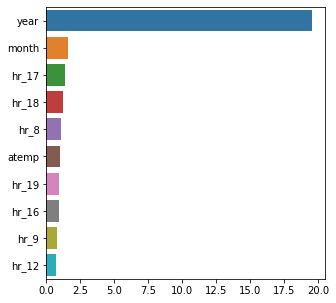

In [354]:
coef = pd.Series(lr_reg.coef_ , index=train_featute_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [355]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model,X_train, X_validation, y_train, y_validation)


# RandomForestRegressor
RMSLE: 0.089
# GradientBoostingRegressor
RMSLE: 0.087
# XGBRegressor
RMSLE: 0.087
# LGBMRegressor
RMSLE: 0.082


In [356]:
test_ohe

instant  holiday  weekday  workingday  weathersit  temp  atemp  hum  \
0       12000        0        0           0           1  0.52   0.50 0.68   
1       12001        0        0           0           1  0.50   0.48 0.72   
2       12002        0        0           0           1  0.50   0.48 0.63   
3       12003        0        0           0           1  0.52   0.50 0.68   
4       12004        0        0           0           1  0.56   0.53 0.56   
...       ...      ...      ...         ...         ...   ...    ...  ...   
5375    17375        0        1           1           2  0.26   0.26 0.60   
5376    17376        0        1           1           2  0.26   0.26 0.60   
5377    17377        0        1           1           1  0.26   0.26 0.60   
5378    17378        0        1           1           1  0.26   0.27 0.56   
5379    17379        0        1           1           1  0.26   0.27 0.65   

      windspeed  year  ...  hr_14  hr_15  hr_16  hr_17  hr_18  hr_19  hr_20  \
0          0.09  2012  ...      0      0      0      0      0      0      0   
1          0.10  2012  ...      0      0      0      0      0      0      0   
2          0.13  2012  ...      0      0      0      0      0      0      0   
3          0.19  2012  ...      0      0      0      0      0      0      0   
4          0.16  2012  ...      0      0      0      0      0      0      0   
...         ...   ...  ...    ...    ...    ...    ...    ...    ...    ...   
5375       0.16  2012  ...      0      0      0      0      0      1      0   
5376       0.16  2012  ...      0      0      0      0      0      0      1   
5377       0.16  2012  ...      0      0      0      0      0      0      0   
5378       0.13  2012  ...      0      0      0      0      0      0      0   
5379       0.13  2012  ...      0      0      0      0      0      0      0   

      hr_21  hr_22  hr_23  
0         0      0      0  
1         0      0      0  
2         0      0      0  
3         0      0      0  
4         0      0      0  
...     ...    ...    ...  
5375      0      0      0  
5376      0      0      0  
5377      1      0      0  
5378      0      1      0  
5379      0      0      1  

[5380 rows x 40 columns]

In [357]:
pred = lgbm_reg.predict(test_ohe)
pred[0:10]

array([2.68192461, 2.65699903, 3.7414909 , 4.56884998, 5.3985992 ,
       5.75058475, 6.0453524 , 6.30455908, 6.35659547, 6.3835626 ])

In [358]:
# back to count's original values 
predicted_count = np.expm1(pred)
predicted_count[0:10]

array([ 13.61319091,  13.25345063,  41.16080088,  95.43314568,
       220.09648625, 313.37443577, 421.14649609, 546.06032644,
       575.28104809, 591.03313241])

In [359]:
# predict count

predicted_count = np.round(predicted_count, 0)
predicted_count

array([ 14.,  13.,  41., ..., 135.,  99.,  62.])

In [360]:
d['cnt'] = pd.DataFrame(predicted_count)

In [361]:
cons1 = df_train[df_train['workingday'] == 1]
cons1

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
47          48 2011-01-03       1   0     1   0        0        1           1   
48          49 2011-01-03       1   0     1   1        0        1           1   
49          50 2011-01-03       1   0     1   4        0        1           1   
50          51 2011-01-03       1   0     1   5        0        1           1   
51          52 2011-01-03       1   0     1   6        0        1           1   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
11966    11967 2012-05-18       2   1     5  19        0        5           1   
11967    11968 2012-05-18       2   1     5  20        0        5           1   
11968    11969 2012-05-18       2   1     5  21        0        5           1   
11969    11970 2012-05-18       2   1     5  22        0        5           1   
11970    11971 2012-05-18       2   1     5  23        0        5           1   

       weathersit  temp  atemp  hum  windspeed  casual  registered  cnt  year  \
47              1  0.22   0.20 0.44       0.36       0           5    5  2011   
48              1  0.20   0.17 0.44       0.42       0           2    2  2011   
49              1  0.16   0.14 0.47       0.39       0           1    1  2011   
50              1  0.16   0.14 0.47       0.28       0           3    3  2011   
51              1  0.14   0.11 0.50       0.39       0          30   30  2011   
...           ...   ...    ...  ...        ...     ...         ...  ...   ...   
11966           1  0.62   0.62 0.41       0.19      91         392  483  2012   
11967           1  0.62   0.62 0.41       0.16      73         264  337  2012   
11968           1  0.60   0.62 0.40       0.00      49         209  258  2012   
11969           1  0.56   0.53 0.52       0.33      57         194  251  2012   
11970           1  0.52   0.50 0.55       0.00      41         133  174  2012   

       month  
47         1  
48         1  
49         1  
50         1  
51         1  
...      ...  
11966      5  
11967      5  
11968      5  
11969      5  
11970      5  

[8208 rows x 19 columns]

In [362]:
con = predic[predic['workingday'] == 1]
con

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
20      12020 2012-05-21       2   1     5   0        0        1           1   
21      12021 2012-05-21       2   1     5   1        0        1           1   
22      12022 2012-05-21       2   1     5   2        0        1           1   
23      12023 2012-05-21       2   1     5   3        0        1           1   
24      12024 2012-05-21       2   1     5   4        0        1           1   
...       ...        ...     ...  ..   ...  ..      ...      ...         ...   
5375    17375 2012-12-31       1   1    12  19        0        1           1   
5376    17376 2012-12-31       1   1    12  20        0        1           1   
5377    17377 2012-12-31       1   1    12  21        0        1           1   
5378    17378 2012-12-31       1   1    12  22        0        1           1   
5379    17379 2012-12-31       1   1    12  23        0        1           1   

      weathersit  temp  atemp  hum  windspeed  year  day  month    cnt  
20             3  0.58   0.55 0.88       0.30  2012   21      5  18.00  
21             3  0.58   0.55 0.88       0.36  2012   21      5   9.00  
22             3  0.56   0.53 0.94       0.25  2012   21      5   8.00  
23             2  0.56   0.53 0.88       0.30  2012   21      5   3.00  
24             3  0.56   0.53 0.88       0.30  2012   21      5   4.00  
...          ...   ...    ...  ...        ...   ...  ...    ...    ...  
5375           2  0.26   0.26 0.60       0.16  2012   31     12 178.00  
5376           2  0.26   0.26 0.60       0.16  2012   31     12 135.00  
5377           1  0.26   0.26 0.60       0.16  2012   31     12 135.00  
5378           1  0.26   0.27 0.56       0.13  2012   31     12  99.00  
5379           1  0.26   0.27 0.65       0.13  2012   31     12  62.00  

[3657 rows x 18 columns]

In [363]:
predic = pd.concat([df_test, d], axis=1)

In [364]:
max(df_train.cnt), min(df_train.cnt)

(957, 1)

In [365]:
max(predic.cnt), min(predic.cnt)

(936.0, 1.0)